# Data processing

This Jupyter notebook will explain the data processing for our project.

Our data processing will consist of combining the features of the EPA's [Smart Location Database](https://web.archive.org/web/20250401114358/https://www.epa.gov/smartgrowth/smart-location-mapping) with an outcome variable generated from Kaggle's [US Accidents (2016 - 2023)](https://archive.today/2025.02.16-012726/https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents).
The dataframe produced by this initial data processing can then be modified further, allowing for multiple customized versions for our various regression models.

After our initial data processing, our dataframe will be as follows.
- Each row will correspond to a census block group from the EPA's Smart Location Database.
- The feature variables will be features of the built environment from the EPA data set.
- The outcome variable will be a population-density-controlled severity-weighted number of accidents observed in the Kaggle data set per census block group.
- We will also do some feature selection and transformations.
- We opted not to do additional data augmentation due to time constraints, but that is something we can implement in the future.
- We *may* perform additional modifications when we are tinkering with our regression models.

Broadly speaking, here are the steps for our initial data processing.
1. Importing the two data sets
2. Getting rid of unnecessary columns and null values
3. Combining the data into one dataframe
4. Feature selection
5. Feature transformation and engineering

## Importing the data

In [1]:
# Import modules
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
# Read Kaggle data
df_kaggle = pd.read_csv("../data/raw/Kaggle/US_Accidents_March23.csv")
df_kaggle

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [3]:
# Read EPA data
gdf_epa = gpd.read_file("../data/raw/EPA/SmartLocationDatabaseV3/SmartLocationDatabase.gdb")
gdf_epa

,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,CBSA_Name,...,VMT_per_worker,VMT_tot_min,VMT_tot_max,VMT_tot_avg,GHG_per_worker,Annual_GHG,SLC_score,Shape_Length,Shape_Area,geometry
0,481130078254,481130078254,48,113,007825,4,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,27.496405,11.442995,82.636303,25.659327,24.499297,6369.817221,77.450956,3110.360820,2.978361e+05,"MULTIPOLYGON (((-68983.316 1091325.734, -68981..."
1,481130078252,481130078252,48,113,007825,2,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,26.465754,11.442995,82.636303,25.659327,23.580987,6131.056669,78.898635,3519.469110,4.849451e+05,"MULTIPOLYGON (((-68891.713 1090955.557, -68860..."
2,481130078253,481130078253,48,113,007825,3,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,32.311348,11.442995,82.636303,25.659327,28.789412,7485.246991,70.687759,1697.091802,1.067059e+05,"MULTIPOLYGON (((-68078.32 1091181.799, -68077...."
3,481130078241,481130078241,48,113,007824,1,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,26.277851,11.442995,82.636303,25.659327,23.413565,6087.527012,79.162569,2922.609204,4.818284e+05,"MULTIPOLYGON (((-68978.261 1090638.77, -68976...."
4,481130078242,481130078242,48,113,007824,2,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,30.138550,11.442995,82.636303,25.659327,26.853448,6981.896477,73.739730,3731.971773,6.876848e+05,"MULTIPOLYGON (((-68980.363 1090202.6, -68965.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220734,780309610002,780309610002,78,030,961000,2,None,None,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3414.446949,3.355857e+05,"MULTIPOLYGON (((3348221.553 50116.644, 3348228..."
220735,780309610003,780309610003,78,030,961000,3,None,None,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2421.025608,2.924305e+05,"MULTIPOLYGON (((3348813.708 51185.14, 3348818...."
220736,780309610005,780309610005,78,030,961000,5,None,None,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.909418,1.619395e+05,"MULTIPOLYGON (((3348457.913 51255.64, 3348596...."
220737,780309607003,780309607003,78,030,960700,3,None,None,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16896.768872,1.038966e+07,"MULTIPOLYGON (((3363559.988 50371.461, 3363564..."


## Trimming down the dataframes

Since our dataframes are so large, it seems prudent to trim them down *before* combining them, as opposed to *after*.

Before combining the dataframes, we expect the two dataframes to be as follows.
- The Kaggle dataframe should contain only the following columns.
    - Starting latitude/longitude, for geospatial merging
    - Severity, for when we weight by severity
- The Kaggle dataframe should drop any rows with null/unknown/nonsensical values for these specified columns.
- The EPA dataframe should contain only the columns of the following categories.
    - ~~Core-based statistical area measures~~
    - Area
    - Demographics
    - Employment
    - Density
    - Diversity
    - Design
    - Transit access
    - Destination accessibility
    - Walkability
    - Geometry

(If, after all of our initial data processing is complete, the final dataframe is too large for efficiently training our models, then we may return to this step and select only the rows from the Kaggle dataframe corresponding to specific years.)

### Trimming the Kaggle dataframe

We will keep only the necessary columns, and drop the rows with null values in these columns.

In [4]:
# May as well check for duplicate rows
df_kaggle_trimmed = df_kaggle.drop_duplicates()
df_kaggle_trimmed


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.010,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.010,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.010,...,False,False,False,False,True,False,Day,Day,Day,Day
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7728389,A-7777757,Source1,2,2019-08-23 18:03:25,2019-08-23 18:32:01,34.002480,-117.379360,33.99888,-117.37094,0.543,...,False,False,False,False,False,False,Day,Day,Day,Day
7728390,A-7777758,Source1,2,2019-08-23 19:11:30,2019-08-23 19:38:23,32.766960,-117.148060,32.76555,-117.15363,0.338,...,False,False,False,False,False,False,Day,Day,Day,Day
7728391,A-7777759,Source1,2,2019-08-23 19:00:21,2019-08-23 19:28:49,33.775450,-117.847790,33.77740,-117.85727,0.561,...,False,False,False,False,False,False,Day,Day,Day,Day
7728392,A-7777760,Source1,2,2019-08-23 19:00:21,2019-08-23 19:29:42,33.992460,-118.403020,33.98311,-118.39565,0.772,...,False,False,False,False,False,False,Day,Day,Day,Day


In [5]:
# Only keep necessary columns
df_kaggle_trimmed = df_kaggle_trimmed[["Start_Time", "Start_Lat", "Start_Lng", "Severity"]]
df_kaggle_trimmed

,Start_Time,Start_Lat,Start_Lng,Severity
0,2016-02-08 05:46:00,39.865147,-84.058723,3
1,2016-02-08 06:07:59,39.928059,-82.831184,2
2,2016-02-08 06:49:27,39.063148,-84.032608,2
3,2016-02-08 07:23:34,39.747753,-84.205582,3
4,2016-02-08 07:39:07,39.627781,-84.188354,2
...,...,...,...,...
7728389,2019-08-23 18:03:25,34.002480,-117.379360,2
7728390,2019-08-23 19:11:30,32.766960,-117.148060,2
7728391,2019-08-23 19:00:21,33.775450,-117.847790,2
7728392,2019-08-23 19:00:21,33.992460,-118.403020,2


In [6]:
# Delete rows with null values
df_kaggle_trimmed = df_kaggle_trimmed.dropna()
df_kaggle_trimmed

,Start_Time,Start_Lat,Start_Lng,Severity
0,2016-02-08 05:46:00,39.865147,-84.058723,3
1,2016-02-08 06:07:59,39.928059,-82.831184,2
2,2016-02-08 06:49:27,39.063148,-84.032608,2
3,2016-02-08 07:23:34,39.747753,-84.205582,3
4,2016-02-08 07:39:07,39.627781,-84.188354,2
...,...,...,...,...
7728389,2019-08-23 18:03:25,34.002480,-117.379360,2
7728390,2019-08-23 19:11:30,32.766960,-117.148060,2
7728391,2019-08-23 19:00:21,33.775450,-117.847790,2
7728392,2019-08-23 19:00:21,33.992460,-118.403020,2


In [7]:
df_kaggle_trimmed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 4 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Start_Time  object 
 1   Start_Lat   float64
 2   Start_Lng   float64
 3   Severity    int64  
dtypes: float64(2), int64(1), object(1)
memory usage: 235.9+ MB


In [8]:
df_kaggle_trimmed.describe()

,Start_Lat,Start_Lng,Severity
count,7.728394e+06,7.728394e+06,7.728394e+06
mean,3.620119e+01,-9.470255e+01,2.212384e+00
std,5.076079e+00,1.739176e+01,4.875313e-01
min,2.455480e+01,-1.246238e+02,1.000000e+00
25%,3.339963e+01,-1.172194e+02,2.000000e+00
50%,3.582397e+01,-8.776662e+01,2.000000e+00
75%,4.008496e+01,-8.035368e+01,2.000000e+00
max,4.900220e+01,-6.711317e+01,4.000000e+00


Notice below that most of the crashes have a "severity" of 2. When we incorporate crash severity into our outcome variable, we will normalize so that a severity of 2 counts as 1 "standard" crash, and that other severities are scaled accordingly.

As a caveat, it is not entirely rigorous to treat this ordinal variable as a ratio variable. However, normalizing our crashes by severity is a practical compromise that allows us to avoid treating all crashes as equal.

For more information on the severity variable, we looked through the following sources. While it is clear that "severity" basically means "delay magnitude" caused by the crash, none of the documentation provides a concrete explanation of the measurements or cutoffs for determining severity.
- These two articles are associated with the [Kaggle data set](https://archive.today/2025.02.16-012726/https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents).
- These articles, as well as [discussion](https://archive.today/2025.04.17-042012/https://www.kaggle.com/datasets/sobhanmoosavi/us-accidents/discussion/113055) on Kaggle, indicate that the severity data is scraped from the Bing and MapQuest Traffic APIs.
    - [Bing Traffic API documentation](https://web.archive.org/web/20250417042512/https://learn.microsoft.com/en-us/bingmaps/rest-services/traffic/get-traffic-incidents)
	- [MapQuest Traffic API documentation](https://web.archive.org/web/20250417042557/https://developer.mapquest.com/documentation/api/traffic/incidents/get.html)

In [9]:
df_kaggle_trimmed.value_counts(subset="Severity", normalize=True)

Severity
2    0.796670
3    0.168125
4    0.026488
1    0.008717
Name: proportion, dtype: float64

I may also want a version without the year 2020, since the COVID-19 pandemic lockdown affected car use during that year.

In [10]:
df_kaggle_trimmed_no2020 = df_kaggle_trimmed[~df_kaggle_trimmed["Start_Time"].str.startswith("2020")]
df_kaggle_trimmed_no2020

,Start_Time,Start_Lat,Start_Lng,Severity
0,2016-02-08 05:46:00,39.865147,-84.058723,3
1,2016-02-08 06:07:59,39.928059,-82.831184,2
2,2016-02-08 06:49:27,39.063148,-84.032608,2
3,2016-02-08 07:23:34,39.747753,-84.205582,3
4,2016-02-08 07:39:07,39.627781,-84.188354,2
...,...,...,...,...
7728389,2019-08-23 18:03:25,34.002480,-117.379360,2
7728390,2019-08-23 19:11:30,32.766960,-117.148060,2
7728391,2019-08-23 19:00:21,33.775450,-117.847790,2
7728392,2019-08-23 19:00:21,33.992460,-118.403020,2


In [11]:
# We can get rid of the `Start_Time` column now
df_kaggle_trimmed = df_kaggle_trimmed.drop(columns="Start_Time")
df_kaggle_trimmed_no2020 = df_kaggle_trimmed_no2020.drop(columns="Start_Time")
df_kaggle_trimmed

,Start_Lat,Start_Lng,Severity
0,39.865147,-84.058723,3
1,39.928059,-82.831184,2
2,39.063148,-84.032608,2
3,39.747753,-84.205582,3
4,39.627781,-84.188354,2
...,...,...,...
7728389,34.002480,-117.379360,2
7728390,32.766960,-117.148060,2
7728391,33.775450,-117.847790,2
7728392,33.992460,-118.403020,2


### Trimming the EPA dataframe

First, we will keep only the necessary columns.
Afterwards, we will decide how to remove rows with nonsensical values.

In [12]:
# May as well check for duplicate rows
gdf_epa_trimmed = gdf_epa.drop_duplicates()
gdf_epa_trimmed

,GEOID10,GEOID20,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,CSA,CSA_Name,CBSA,CBSA_Name,...,VMT_per_worker,VMT_tot_min,VMT_tot_max,VMT_tot_avg,GHG_per_worker,Annual_GHG,SLC_score,Shape_Length,Shape_Area,geometry
0,481130078254,481130078254,48,113,007825,4,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,27.496405,11.442995,82.636303,25.659327,24.499297,6369.817221,77.450956,3110.360820,2.978361e+05,"MULTIPOLYGON (((-68983.316 1091325.734, -68981..."
1,481130078252,481130078252,48,113,007825,2,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,26.465754,11.442995,82.636303,25.659327,23.580987,6131.056669,78.898635,3519.469110,4.849451e+05,"MULTIPOLYGON (((-68891.713 1090955.557, -68860..."
2,481130078253,481130078253,48,113,007825,3,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,32.311348,11.442995,82.636303,25.659327,28.789412,7485.246991,70.687759,1697.091802,1.067059e+05,"MULTIPOLYGON (((-68078.32 1091181.799, -68077...."
3,481130078241,481130078241,48,113,007824,1,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,26.277851,11.442995,82.636303,25.659327,23.413565,6087.527012,79.162569,2922.609204,4.818284e+05,"MULTIPOLYGON (((-68978.261 1090638.77, -68976...."
4,481130078242,481130078242,48,113,007824,2,206,"Dallas-Fort Worth, TX-OK",19100,"Dallas-Fort Worth-Arlington, TX",...,30.138550,11.442995,82.636303,25.659327,26.853448,6981.896477,73.739730,3731.971773,6.876848e+05,"MULTIPOLYGON (((-68980.363 1090202.6, -68965.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220734,780309610002,780309610002,78,030,961000,2,None,None,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3414.446949,3.355857e+05,"MULTIPOLYGON (((3348221.553 50116.644, 3348228..."
220735,780309610003,780309610003,78,030,961000,3,None,None,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2421.025608,2.924305e+05,"MULTIPOLYGON (((3348813.708 51185.14, 3348818...."
220736,780309610005,780309610005,78,030,961000,5,None,None,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.909418,1.619395e+05,"MULTIPOLYGON (((3348457.913 51255.64, 3348596...."
220737,780309607003,780309607003,78,030,960700,3,None,None,,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16896.768872,1.038966e+07,"MULTIPOLYGON (((3363559.988 50371.461, 3363564..."


In [13]:
print(gdf_epa_trimmed.columns.values)

['GEOID10' 'GEOID20' 'STATEFP' 'COUNTYFP' 'TRACTCE' 'BLKGRPCE' 'CSA'
 'CSA_Name' 'CBSA' 'CBSA_Name' 'CBSA_POP' 'CBSA_EMP' 'CBSA_WRK' 'Ac_Total'
 'Ac_Water' 'Ac_Land' 'Ac_Unpr' 'TotPop' 'CountHU' 'HH' 'P_WrkAge'
 'AutoOwn0' 'Pct_AO0' 'AutoOwn1' 'Pct_AO1' 'AutoOwn2p' 'Pct_AO2p'
 'Workers' 'R_LowWageWk' 'R_MedWageWk' 'R_HiWageWk' 'R_PCTLOWWAGE'
 'TotEmp' 'E5_Ret' 'E5_Off' 'E5_Ind' 'E5_Svc' 'E5_Ent' 'E8_Ret' 'E8_off'
 'E8_Ind' 'E8_Svc' 'E8_Ent' 'E8_Ed' 'E8_Hlth' 'E8_Pub' 'E_LowWageWk'
 'E_MedWageWk' 'E_HiWageWk' 'E_PctLowWage' 'D1A' 'D1B' 'D1C' 'D1C5_RET'
 'D1C5_OFF' 'D1C5_IND' 'D1C5_SVC' 'D1C5_ENT' 'D1C8_RET' 'D1C8_OFF'
 'D1C8_IND' 'D1C8_SVC' 'D1C8_ENT' 'D1C8_ED' 'D1C8_HLTH' 'D1C8_PUB' 'D1D'
 'D1_FLAG' 'D2A_JPHH' 'D2B_E5MIX' 'D2B_E5MIXA' 'D2B_E8MIX' 'D2B_E8MIXA'
 'D2A_EPHHM' 'D2C_TRPMX1' 'D2C_TRPMX2' 'D2C_TRIPEQ' 'D2R_JOBPOP'
 'D2R_WRKEMP' 'D2A_WRKEMP' 'D2C_WREMLX' 'D3A' 'D3AAO' 'D3AMM' 'D3APO'
 'D3B' 'D3BAO' 'D3BMM3' 'D3BMM4' 'D3BPO3' 'D3BPO4' 'D4A' 'D4B025' 'D4B050'
 'D4C' 'D4D' 'D4E' '

In [14]:
# Drop unnecessary columns
unnecessary_cols = ["GEOID10",
                    "GEOID20",
                    #"STATEFP", # Although State and County are not features that our model will use,
                    #"COUNTYFP", # we need them for our geospatial visualization
                    "TRACTCE",
                    "BLKGRPCE",
                    "CSA",
                    "CSA_Name",
                    "CBSA",
                    "CBSA_Name",
                    "CBSA_POP",
                    "CBSA_EMP",
                    "CBSA_WRK"]

gdf_epa_trimmed = gdf_epa_trimmed.drop(columns = unnecessary_cols)
gdf_epa_trimmed

,STATEFP,COUNTYFP,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,...,VMT_per_worker,VMT_tot_min,VMT_tot_max,VMT_tot_avg,GHG_per_worker,Annual_GHG,SLC_score,Shape_Length,Shape_Area,geometry
0,48,113,73.595028,0.000000,73.595028,73.595028,1202,460.0,423.0,0.549,...,27.496405,11.442995,82.636303,25.659327,24.499297,6369.817221,77.450956,3110.360820,2.978361e+05,"MULTIPOLYGON (((-68983.316 1091325.734, -68981..."
1,48,113,119.829909,0.000000,119.829909,119.214200,710,409.0,409.0,0.466,...,26.465754,11.442995,82.636303,25.659327,23.580987,6131.056669,78.898635,3519.469110,4.849451e+05,"MULTIPOLYGON (((-68891.713 1090955.557, -68860..."
2,48,113,26.367053,0.000000,26.367053,26.367050,737,365.0,329.0,0.811,...,32.311348,11.442995,82.636303,25.659327,28.789412,7485.246991,70.687759,1697.091802,1.067059e+05,"MULTIPOLYGON (((-68078.32 1091181.799, -68077...."
3,48,113,119.060687,0.000000,119.060687,119.060687,904,384.0,384.0,0.638,...,26.277851,11.442995,82.636303,25.659327,23.413565,6087.527012,79.162569,2922.609204,4.818284e+05,"MULTIPOLYGON (((-68978.261 1090638.77, -68976...."
4,48,113,169.927211,0.000000,169.927211,148.742920,948,343.0,343.0,0.506,...,30.138550,11.442995,82.636303,25.659327,26.853448,6981.896477,73.739730,3731.971773,6.876848e+05,"MULTIPOLYGON (((-68980.363 1090202.6, -68965.2..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220734,78,030,82.923548,0.000000,82.923548,78.187256,1471,685.0,573.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3414.446949,3.355857e+05,"MULTIPOLYGON (((3348221.553 50116.644, 3348228..."
220735,78,030,72.260936,0.000000,72.260936,72.260936,940,581.0,418.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2421.025608,2.924305e+05,"MULTIPOLYGON (((3348813.708 51185.14, 3348818...."
220736,78,030,40.014880,0.000000,40.014880,40.014880,878,502.0,403.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1955.909418,1.619395e+05,"MULTIPOLYGON (((3348457.913 51255.64, 3348596...."
220737,78,030,2567.286469,1661.911327,905.375141,860.333055,1278,1208.0,613.0,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16896.768872,1.038966e+07,"MULTIPOLYGON (((3363559.988 50371.461, 3363564..."


Referencing the [Smart Location Database Technical Documentation and User Guide Version 3.0](https://web.archive.org/web/20250331224746/https://www.epa.gov/system/files/documents/2023-10/epa_sld_3.0_technicaldocumentationuserguide_may2021_0.pdf), we may determine nonsensical values for certain columns.
- We don't want to keep any rows where land area equals zero, i.e. `Ac_Land == 0`.
- Motor vehicle crashes can occur in census block groups (CBGs) where the population is zero, but in such census block groups, we'll see zero/null values for many of the other columns, so we may want to delete such rows. The same can be said for rows where the number of housing units or households is zero.
- Many columns (e.g. all Density (D1), all Diversity (D2), some Transit Access (D4), some Destination Accessibility, and all Walkability columns) are derived from other variables in the Smart Location Database, so if we see null values, that probably means something went wrong, e.g. in "jobs per household" we might see null values in census block groups with zero households. We should get rid of these rows.
- Footnote 65 of the SLD user guide says that a value of `-99999` was assigned to assigned to variables D4, D5b, and D5d that exceeded distance thresholds or did not have coverage. Furthermore, CBGs with no land, no population, or no jobs also received a value of `-99999` in these variables. We should deal with these rows somehow.
- Some columns are not documented in the SLD user guide. Furthermore, I could not find them in the [Access to Workers and Jobs via Transit Technical Documentation and Data User Guide](https://web.archive.org/web/20250321205611/https://www.epa.gov/sites/default/files/2014-03/documents/sld_trans45_ug_0.pdf), nor in the [National Walkability Index Methodology and User Guide](https://web.archive.org/web/20250308090700/https://www.epa.gov/sites/default/files/2021-06/documents/national_walkability_index_methodology_and_user_guide_june2021.pdf).
    - Some of the column names have reasonable interpretations, but others are indecipherable without documentation.
    - Although some of these columns seem very interesting to me, e.g. `NonCom_VMT_Per_Worker`, we should eliminate them since we don't have any precise documentation on the meaning of these columns.


We will try to deal with problematic rows and columns at this stage.

In [15]:
# How many CBGs have zero/null land area?
gdf_epa_trimmed.value_counts(subset="Ac_Land", dropna=False)

Ac_Land
0.000000e+00    605
1.398166e+01      4
4.025358e+01      4
1.622893e+02      4
1.030217e+02      4
               ... 
1.770963e+02      1
1.770973e+02      1
1.771018e+02      1
1.771027e+02      1
3.914039e+07      1
Name: count, Length: 214514, dtype: int64

In [16]:
# How many CBGs have zero/null population?
gdf_epa_trimmed.value_counts(subset="TotPop", dropna=False)

TotPop
0        1153
960       186
818       185
954       184
994       179
         ... 
5787        1
5785        1
5784        1
5780        1
55407       1
Name: count, Length: 6407, dtype: int64

In [17]:
# How many CBGs have zero/null jobs?
gdf_epa_trimmed.value_counts(subset="TotEmp", dropna=False)

TotEmp
0         5162
20         876
25         862
22         846
28         825
          ... 
6519         1
6522         1
6524         1
6528         1
266101       1
Name: count, Length: 7840, dtype: int64

In [18]:
# Let's see which columns have null values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(gdf_epa_trimmed.isna().sum())

STATEFP                      0
COUNTYFP                     0
Ac_Total                     0
Ac_Water                     0
Ac_Land                      0
Ac_Unpr                      0
TotPop                       0
CountHU                    275
HH                         275
P_WrkAge                     0
AutoOwn0                     0
Pct_AO0                      0
AutoOwn1                     0
Pct_AO1                      0
AutoOwn2p                    0
Pct_AO2p                     0
Workers                      0
R_LowWageWk                  0
R_MedWageWk                  0
R_HiWageWk                   0
R_PCTLOWWAGE                 0
TotEmp                       0
E5_Ret                       0
E5_Off                       0
E5_Ind                       0
E5_Svc                       0
E5_Ent                       0
E8_Ret                       0
E8_off                       0
E8_Ind                       0
E8_Svc                       0
E8_Ent                       0
E8_Ed   

In [19]:
# We can safely drop rows with null values
gdf_epa_trimmed = gdf_epa_trimmed.dropna()
gdf_epa_trimmed

,STATEFP,COUNTYFP,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,...,VMT_per_worker,VMT_tot_min,VMT_tot_max,VMT_tot_avg,GHG_per_worker,Annual_GHG,SLC_score,Shape_Length,Shape_Area,geometry
0,48,113,73.595028,0.000000,73.595028,73.595028,1202,460.0,423.0,0.549,...,27.496405,11.442995,82.636303,25.659327,24.499297,6369.817221,77.450956,3110.360820,2.978361e+05,"MULTIPOLYGON (((-68983.316 1091325.734, -68981..."
2,48,113,26.367053,0.000000,26.367053,26.367050,737,365.0,329.0,0.811,...,32.311348,11.442995,82.636303,25.659327,28.789412,7485.246991,70.687759,1697.091802,1.067059e+05,"MULTIPOLYGON (((-68078.32 1091181.799, -68077...."
4,48,113,169.927211,0.000000,169.927211,148.742920,948,343.0,343.0,0.506,...,30.138550,11.442995,82.636303,25.659327,26.853448,6981.896477,73.739730,3731.971773,6.876848e+05,"MULTIPOLYGON (((-68980.363 1090202.6, -68965.2..."
5,48,113,50.687129,0.000000,50.687129,50.687130,1336,556.0,497.0,0.588,...,35.714644,11.442995,82.636303,25.659327,31.821748,8273.654505,65.907400,3109.651786,2.051268e+05,"MULTIPOLYGON (((-68220.832 1090828.166, -68198..."
6,48,113,200.640752,0.000000,200.640752,200.640752,1541,451.0,368.0,0.644,...,35.393414,11.442995,82.636303,25.659327,31.535532,8199.238203,66.358609,4345.799339,8.119811e+05,"MULTIPOLYGON (((-64915.414 1072849.198, -64911..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217734,56,025,193.420737,0.000000,193.420737,185.670240,1251,588.0,557.0,0.580,...,19.370572,15.631580,25.712336,19.996500,17.259180,4487.386771,62.909606,4552.814772,7.827653e+05,"MULTIPOLYGON (((-838700.534 2248815.049, -8386..."
217735,56,025,495.303549,44.102902,451.200646,376.627030,1292,501.0,473.0,0.593,...,19.821008,15.631580,25.712336,19.996500,17.660518,4591.734745,58.441331,7737.052515,2.004467e+06,"MULTIPOLYGON (((-841140.184 2250371.513, -8411..."
217736,56,025,126.513965,0.000000,126.513965,123.144540,1055,456.0,456.0,0.596,...,16.442132,15.631580,25.712336,19.996500,14.649940,3808.984342,91.959414,3426.713295,5.119923e+05,"MULTIPOLYGON (((-839920.23 2249768.906, -83990..."
217737,56,017,367912.651157,810.976517,367101.674640,221749.898140,833,509.0,425.0,0.586,...,27.243168,18.353785,28.388537,21.724116,24.273663,6311.152351,11.414024,190407.629036,1.488922e+09,"MULTIPOLYGON (((-979542.464 2354859.671, -9795..."


In [20]:
# We can also safely drop columns that are not documented in the SLD user guide
undocumented_cols = ["Region",
                     "Households", # Why does this column exist when we have `HH`?
                     "Workers_1", # Why does this column exist when we have `TotEmp`?
                     "Residents", # You can ask the same question of many of these unexplained columns.
                     "Drivers",
                     "Vehicles",
                     "White",
                     "Male",
                     "Lowwage",
                     "Medwage",
                     "Highwage",
                     "W_P_Lowwage",
                     "W_P_Medwage",
                     "W_P_Highwage",
                     "GasPrice",
                     "logd1a",
                     "logd1c",
                     "logd3aao",
                     "logd3apo",
                     "d4bo25",
                     "d5dei_1",
                     "logd4d",
                     "UPTpercap",
                     "B_C_constant",
                     "B_C_male",
                     "B_C_ld1c",
                     "B_C_drvmveh",
                     "B_C_ld1a",
                     "B_C_ld3apo",
                     "B_C_inc1",
                     "B_C_gasp",
                     "B_N_constant",
                     "B_N_inc2",
                     "B_N_inc3",
                     "B_N_white",
                     "B_N_male",
                     "B_N_drvmveh",
                     "B_N_gasp",
                     "B_N_ld1a",
                     "B_N_ld1c",
                     "B_N_ld3aao",
                     "B_N_ld3apo",
                     "B_N_d4bo25",
                     "B_N_d5dei",
                     "B_N_UPTpc",
                     "C_R_Households",
                     "C_R_Pop",
                     "C_R_Workers",
                     "C_R_Drivers",
                     "C_R_Vehicles",
                     "C_R_White",
                     "C_R_Male",
                     "C_R_Lowwage",
                     "C_R_Medwage",
                     "C_R_Highwage",
                     "C_R_DrmV",
                     "NonCom_VMT_Per_Worker", # Probably "noncommercial vehicle miles traveled per worker"
                     "Com_VMT_Per_Worker", # I'm really curious about all these VMT columns....
                     "VMT_per_worker", # ...but I don't think I can keep them, because they aren't documented in the SLD user guide....
                     "VMT_tot_min",
                     "VMT_tot_max",
                     "VMT_tot_avg",
                     "GHG_per_worker",
                     "Annual_GHG",
                     "SLC_score"]

gdf_epa_trimmed = gdf_epa_trimmed.drop(columns = undocumented_cols)
gdf_epa_trimmed

,STATEFP,COUNTYFP,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,...,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,geometry
0,48,113,73.595028,0.000000,73.595028,73.595028,1202,460.0,423.0,0.549,...,0.000476,0.137707,6.0,14.0,15.0,17.0,14.000000,3110.360820,2.978361e+05,"MULTIPOLYGON (((-68983.316 1091325.734, -68981..."
2,48,113,26.367053,0.000000,26.367053,26.367050,737,365.0,329.0,0.811,...,0.000736,0.213146,1.0,1.0,7.0,17.0,8.333333,1697.091802,1.067059e+05,"MULTIPOLYGON (((-68078.32 1091181.799, -68077...."
4,48,113,169.927211,0.000000,169.927211,148.742920,948,343.0,343.0,0.506,...,0.000433,0.125296,4.0,7.0,11.0,14.0,10.166667,3731.971773,6.876848e+05,"MULTIPOLYGON (((-68980.363 1090202.6, -68965.2..."
5,48,113,50.687129,0.000000,50.687129,50.687130,1336,556.0,497.0,0.588,...,0.000467,0.135336,1.0,4.0,5.0,13.0,6.833333,3109.651786,2.051268e+05,"MULTIPOLYGON (((-68220.832 1090828.166, -68198..."
6,48,113,200.640752,0.000000,200.640752,200.640752,1541,451.0,368.0,0.644,...,0.000184,0.053166,1.0,1.0,10.0,13.0,8.000000,4345.799339,8.119811e+05,"MULTIPOLYGON (((-64915.414 1072849.198, -64911..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217734,56,025,193.420737,0.000000,193.420737,185.670240,1251,588.0,557.0,0.580,...,-99999.000000,-99999.000000,3.0,8.0,17.0,1.0,7.833333,4552.814772,7.827653e+05,"MULTIPOLYGON (((-838700.534 2248815.049, -8386..."
217735,56,025,495.303549,44.102902,451.200646,376.627030,1292,501.0,473.0,0.593,...,-99999.000000,-99999.000000,16.0,18.0,13.0,1.0,10.333333,7737.052515,2.004467e+06,"MULTIPOLYGON (((-841140.184 2250371.513, -8411..."
217736,56,025,126.513965,0.000000,126.513965,123.144540,1055,456.0,456.0,0.596,...,-99999.000000,-99999.000000,12.0,15.0,18.0,1.0,10.833333,3426.713295,5.119923e+05,"MULTIPOLYGON (((-839920.23 2249768.906, -83990..."
217737,56,017,367912.651157,810.976517,367101.674640,221749.898140,833,509.0,425.0,0.586,...,-99999.000000,-99999.000000,17.0,12.0,1.0,1.0,5.500000,190407.629036,1.488922e+09,"MULTIPOLYGON (((-979542.464 2354859.671, -9795..."


In [21]:
# Let's see which columns have lots of zero values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display((gdf_epa_trimmed == 0).sum())

STATEFP              0
COUNTYFP             0
Ac_Total             0
Ac_Water        103857
Ac_Land              0
Ac_Unpr            225
TotPop               5
CountHU              6
HH                   6
P_WrkAge            11
AutoOwn0         35762
Pct_AO0          35762
AutoOwn1           332
Pct_AO1            332
AutoOwn2p          697
Pct_AO2p           697
Workers             37
R_LowWageWk        156
R_MedWageWk        122
R_HiWageWk         107
R_PCTLOWWAGE       156
TotEmp            1057
E5_Ret           43337
E5_Off           43692
E5_Ind           20004
E5_Svc            6691
E5_Ent           56844
E8_Ret           43337
E8_off           49933
E8_Ind           20004
E8_Svc           17303
E8_Ent           56844
E8_Ed           111665
E8_Hlth          41738
E8_Pub          150629
E_LowWageWk       2776
E_MedWageWk       2231
E_HiWageWk        5380
E_PctLowWage      2776
D1A                  6
D1B                  5
D1C               1057
D1C5_RET         43337
D1C5_OFF   

In [22]:
# I think it's safe to remove rows with zero land, population, employment, etc.
# These rows make up a very small portion of the data set anyways.
gdf_epa_trimmed = gdf_epa_trimmed[(gdf_epa_trimmed["Ac_Land"] != 0) # Land area should be nonzero
                                  & (gdf_epa_trimmed["TotPop"] != 0) # Total population should be nonzero
                                  & (gdf_epa_trimmed["CountHU"] != 0) # Housing units should be nonzero
                                  & (gdf_epa_trimmed["HH"] != 0) # Households should be nonzero
                                  & (gdf_epa_trimmed["TotEmp"] != 0) # Total employment should be nonzero
                                  ]
gdf_epa_trimmed

,STATEFP,COUNTYFP,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,...,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,geometry
0,48,113,73.595028,0.000000,73.595028,73.595028,1202,460.0,423.0,0.549,...,0.000476,0.137707,6.0,14.0,15.0,17.0,14.000000,3110.360820,2.978361e+05,"MULTIPOLYGON (((-68983.316 1091325.734, -68981..."
4,48,113,169.927211,0.000000,169.927211,148.742920,948,343.0,343.0,0.506,...,0.000433,0.125296,4.0,7.0,11.0,14.0,10.166667,3731.971773,6.876848e+05,"MULTIPOLYGON (((-68980.363 1090202.6, -68965.2..."
5,48,113,50.687129,0.000000,50.687129,50.687130,1336,556.0,497.0,0.588,...,0.000467,0.135336,1.0,4.0,5.0,13.0,6.833333,3109.651786,2.051268e+05,"MULTIPOLYGON (((-68220.832 1090828.166, -68198..."
6,48,113,200.640752,0.000000,200.640752,200.640752,1541,451.0,368.0,0.644,...,0.000184,0.053166,1.0,1.0,10.0,13.0,8.000000,4345.799339,8.119811e+05,"MULTIPOLYGON (((-64915.414 1072849.198, -64911..."
7,48,113,63.992475,0.000000,63.992475,63.992475,583,255.0,255.0,0.690,...,0.001031,0.298647,9.0,12.0,13.0,16.0,13.166667,2248.148479,2.589736e+05,"MULTIPOLYGON (((-70884.46 1083187.481, -70884...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217734,56,025,193.420737,0.000000,193.420737,185.670240,1251,588.0,557.0,0.580,...,-99999.000000,-99999.000000,3.0,8.0,17.0,1.0,7.833333,4552.814772,7.827653e+05,"MULTIPOLYGON (((-838700.534 2248815.049, -8386..."
217735,56,025,495.303549,44.102902,451.200646,376.627030,1292,501.0,473.0,0.593,...,-99999.000000,-99999.000000,16.0,18.0,13.0,1.0,10.333333,7737.052515,2.004467e+06,"MULTIPOLYGON (((-841140.184 2250371.513, -8411..."
217736,56,025,126.513965,0.000000,126.513965,123.144540,1055,456.0,456.0,0.596,...,-99999.000000,-99999.000000,12.0,15.0,18.0,1.0,10.833333,3426.713295,5.119923e+05,"MULTIPOLYGON (((-839920.23 2249768.906, -83990..."
217737,56,017,367912.651157,810.976517,367101.674640,221749.898140,833,509.0,425.0,0.586,...,-99999.000000,-99999.000000,17.0,12.0,1.0,1.0,5.500000,190407.629036,1.488922e+09,"MULTIPOLYGON (((-979542.464 2354859.671, -9795..."


In [23]:
# Let's see which columns have lots of -99999 values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display((gdf_epa_trimmed == -99999).sum())

STATEFP              0
COUNTYFP             0
Ac_Total             0
Ac_Water             0
Ac_Land              0
Ac_Unpr              0
TotPop               0
CountHU              0
HH                   0
P_WrkAge             0
AutoOwn0             0
Pct_AO0              0
AutoOwn1             0
Pct_AO1              0
AutoOwn2p            0
Pct_AO2p             0
Workers              0
R_LowWageWk          0
R_MedWageWk          0
R_HiWageWk           0
R_PCTLOWWAGE         0
TotEmp               0
E5_Ret               0
E5_Off               0
E5_Ind               0
E5_Svc               0
E5_Ent               0
E8_Ret               0
E8_off               0
E8_Ind               0
E8_Svc               0
E8_Ent               0
E8_Ed                0
E8_Hlth              0
E8_Pub               0
E_LowWageWk          0
E_MedWageWk          0
E_HiWageWk           0
E_PctLowWage         0
D1A                  0
D1B                  0
D1C                  0
D1C5_RET             0
D1C5_OFF   

The following columns have lots of `-99999` values.
- `D4A`: Distance from the population-weighted centroid to nearest transit stop (meters) 
- `D4C`: Aggregate frequency of transit service within 0.25 miles of CBG boundary per hour during evening peak period 
- `D4D`: Aggregate frequency of transit service [`D4c`] per square mile
- `D4E`: Aggregate frequency of transit service [`D4c`] per capita
- `D5BR`: Jobs within 45-minute transit commute, distance decay (walk network travel time, GTFS schedules) weighted 
- `D5BE`: Working age population within 45-minute transit commute, time decay (walk network travel time, GTFS schedules) weighted 
- `D5DR`: Proportional Accessibility of Regional Destinations - Transit: Employment accessibility expressed as a ratio of total MSA accessibility 
- `D5DRI`: Regional Centrality Index – Transit: CBG [`D5dr`] score relative to max CBSA [`D5dr`] score 
- `D5DE`: Proportional Accessibility of Regional Destinations - Transit: Working age population accessibility expressed as a ratio of total MSA accessibility 
- `D5DEI`: Regional Centrality Index – Transit: CBG [`D5de`] score relative to max CBSA [`D5de`] score 

We have at least four possible solutions.
1. Do nothing.
2. Eliminate all rows with problematic values.
3. Eliminate these problematic columns.
4. Create additional columns encoding whether the aforementioned columns have a problematic value or not, then set those problematic values to something more reasonable.

These solutions have pros and cons.
- The first solution is the easiest, but forces our model to deal with these nonsensical values.
- The second solution is also easy, but gets rid of over 100k rows, when we only had about 220k rows originally.
- The second solution also eliminates all CBGs that are not close to a transit stop, which hinders our ability to learn the effect of proximity to transit stops.
- The third solution allows us to keep all of our rows, but we lose valuable information about proximity to transit.
- The fourth solution provides extra columns that the model can learn to use, perhaps allowing the model to ignore the problematic columns when appropriate.
- However, with the fourth solution, if we want to set those problematic values to something reasonable, we have to decide the appropriate value on a column-by-column basis, at the very least.

In [24]:
# Solution 1 is to do nothing
# We let `gdf_epa_trimmed` be the result of solution 1

# Solution 2 is eliminating all rows with problematic values
gdf_epa_trimmed2 = gdf_epa_trimmed[(gdf_epa_trimmed["D4A"] != -99999)
                                   & (gdf_epa_trimmed["D4C"] != -99999)
                                   & (gdf_epa_trimmed["D4D"] != -99999)
                                   & (gdf_epa_trimmed["D4E"] != -99999)
                                   & (gdf_epa_trimmed["D5BR"] != -99999)
                                   & (gdf_epa_trimmed["D5BE"] != -99999)
                                   & (gdf_epa_trimmed["D5DR"] != -99999)
                                   & (gdf_epa_trimmed["D5DRI"] != -99999)
                                   & (gdf_epa_trimmed["D5DE"] != -99999)
                                   & (gdf_epa_trimmed["D5DEI"] != -99999)
                                   ]
gdf_epa_trimmed2

,STATEFP,COUNTYFP,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,...,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,geometry
0,48,113,73.595028,0.000000,73.595028,73.595028,1202,460.0,423.0,0.549,...,0.000476,0.137707,6.0,14.0,15.0,17.0,14.000000,3110.360820,2.978361e+05,"MULTIPOLYGON (((-68983.316 1091325.734, -68981..."
4,48,113,169.927211,0.000000,169.927211,148.742920,948,343.0,343.0,0.506,...,0.000433,0.125296,4.0,7.0,11.0,14.0,10.166667,3731.971773,6.876848e+05,"MULTIPOLYGON (((-68980.363 1090202.6, -68965.2..."
5,48,113,50.687129,0.000000,50.687129,50.687130,1336,556.0,497.0,0.588,...,0.000467,0.135336,1.0,4.0,5.0,13.0,6.833333,3109.651786,2.051268e+05,"MULTIPOLYGON (((-68220.832 1090828.166, -68198..."
6,48,113,200.640752,0.000000,200.640752,200.640752,1541,451.0,368.0,0.644,...,0.000184,0.053166,1.0,1.0,10.0,13.0,8.000000,4345.799339,8.119811e+05,"MULTIPOLYGON (((-64915.414 1072849.198, -64911..."
7,48,113,63.992475,0.000000,63.992475,63.992475,583,255.0,255.0,0.690,...,0.001031,0.298647,9.0,12.0,13.0,16.0,13.166667,2248.148479,2.589736e+05,"MULTIPOLYGON (((-70884.46 1083187.481, -70884...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217240,55,139,128.130246,0.000000,128.130246,128.130246,1276,472.0,472.0,0.683,...,0.017757,0.674731,2.0,3.0,12.0,15.0,9.833333,3411.047853,5.185359e+05,"MULTIPOLYGON (((598797.399 2377810.063, 598830..."
217241,55,139,258.160196,62.244490,195.915706,188.015630,1298,493.0,485.0,0.648,...,0.016797,0.638243,6.0,13.0,16.0,20.0,15.166667,6682.750786,1.044760e+06,"MULTIPOLYGON (((592341.815 2360638.511, 592350..."
217245,55,133,76.190814,0.112925,76.077889,76.077889,868,403.0,403.0,0.699,...,0.000089,0.036981,1.0,1.0,7.0,16.0,8.000000,2175.483585,3.083394e+05,"MULTIPOLYGON (((626796.023 2245976.717, 626796..."
217264,55,133,205.570397,7.322561,198.247836,188.615010,1378,616.0,569.0,0.620,...,0.000290,0.120582,14.0,4.0,14.0,19.0,14.000000,5390.952613,8.319341e+05,"MULTIPOLYGON (((627236.026 2248256.328, 627255..."


In [25]:
# Solution 3 is eliminating the problematic columns
gdf_epa_trimmed3 = gdf_epa_trimmed.drop(columns=["D4A",
                                                 "D4C",
                                                 "D4D",
                                                 "D4E",
                                                 "D5BR",
                                                 "D5BE",
                                                 "D5DR",
                                                 "D5DRI",
                                                 "D5DE",
                                                 "D5DEI"])
gdf_epa_trimmed3

,STATEFP,COUNTYFP,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,...,D5CE,D5CEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,geometry
0,48,113,73.595028,0.000000,73.595028,73.595028,1202,460.0,423.0,0.549,...,0.000358,0.841299,6.0,14.0,15.0,17.0,14.000000,3110.360820,2.978361e+05,"MULTIPOLYGON (((-68983.316 1091325.734, -68981..."
4,48,113,169.927211,0.000000,169.927211,148.742920,948,343.0,343.0,0.506,...,0.000281,0.659846,4.0,7.0,11.0,14.0,10.166667,3731.971773,6.876848e+05,"MULTIPOLYGON (((-68980.363 1090202.6, -68965.2..."
5,48,113,50.687129,0.000000,50.687129,50.687130,1336,556.0,497.0,0.588,...,0.000341,0.802364,1.0,4.0,5.0,13.0,6.833333,3109.651786,2.051268e+05,"MULTIPOLYGON (((-68220.832 1090828.166, -68198..."
6,48,113,200.640752,0.000000,200.640752,200.640752,1541,451.0,368.0,0.644,...,0.000242,0.569870,1.0,1.0,10.0,13.0,8.000000,4345.799339,8.119811e+05,"MULTIPOLYGON (((-64915.414 1072849.198, -64911..."
7,48,113,63.992475,0.000000,63.992475,63.992475,583,255.0,255.0,0.690,...,0.000300,0.704930,9.0,12.0,13.0,16.0,13.166667,2248.148479,2.589736e+05,"MULTIPOLYGON (((-70884.46 1083187.481, -70884...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217734,56,025,193.420737,0.000000,193.420737,185.670240,1251,588.0,557.0,0.580,...,0.026567,0.906221,3.0,8.0,17.0,1.0,7.833333,4552.814772,7.827653e+05,"MULTIPOLYGON (((-838700.534 2248815.049, -8386..."
217735,56,025,495.303549,44.102902,451.200646,376.627030,1292,501.0,473.0,0.593,...,0.027227,0.928737,16.0,18.0,13.0,1.0,10.333333,7737.052515,2.004467e+06,"MULTIPOLYGON (((-841140.184 2250371.513, -8411..."
217736,56,025,126.513965,0.000000,126.513965,123.144540,1055,456.0,456.0,0.596,...,0.023797,0.811746,12.0,15.0,18.0,1.0,10.833333,3426.713295,5.119923e+05,"MULTIPOLYGON (((-839920.23 2249768.906, -83990..."
217737,56,017,367912.651157,810.976517,367101.674640,221749.898140,833,509.0,425.0,0.586,...,0.000000,0.000000,17.0,12.0,1.0,1.0,5.500000,190407.629036,1.488922e+09,"MULTIPOLYGON (((-979542.464 2354859.671, -9795..."


In [26]:
# Solution 4 is more complicated....

# I am going to skip Solution 4 for now, just so I can keep making progress.

## Combining the data sets

Now we want to combine the EPA data and the Kaggle data.
- First, we need to turn the Kaggle dataframe into a geodataframe with the correct Coordinate Reference System (CRS).
- Next, we can aggregate the crashes that occur within each census block group (CBG).
- Finally, we can combine with the EPA data.

### Dealing with CRS

We will convert the Kaggle dataframe into a geodataframe, then convert it to the correct CRS.

In [27]:
# Kaggle Geodataframe
gdf_kaggle = gpd.GeoDataFrame(df_kaggle_trimmed,
                                      geometry=gpd.points_from_xy(df_kaggle_trimmed.Start_Lng, df_kaggle_trimmed.Start_Lat), 
                                      crs = "EPSG:4326") # World geodetic system, see https://epsg.io/4326

gdf_kaggle

,Start_Lat,Start_Lng,Severity,geometry
0,39.865147,-84.058723,3,POINT (-84.05872 39.86515)
1,39.928059,-82.831184,2,POINT (-82.83118 39.92806)
2,39.063148,-84.032608,2,POINT (-84.03261 39.06315)
3,39.747753,-84.205582,3,POINT (-84.20558 39.74775)
4,39.627781,-84.188354,2,POINT (-84.18835 39.62778)
...,...,...,...,...
7728389,34.002480,-117.379360,2,POINT (-117.37936 34.00248)
7728390,32.766960,-117.148060,2,POINT (-117.14806 32.76696)
7728391,33.775450,-117.847790,2,POINT (-117.84779 33.77545)
7728392,33.992460,-118.403020,2,POINT (-118.40302 33.99246)


In [28]:
# Kaggle Geodataframe without 2020
gdf_kaggle_no2020 = gpd.GeoDataFrame(df_kaggle_trimmed_no2020,
                                      geometry=gpd.points_from_xy(df_kaggle_trimmed_no2020.Start_Lng, df_kaggle_trimmed_no2020.Start_Lat), 
                                      crs = "EPSG:4326") # World geodetic system, see https://epsg.io/4326

gdf_kaggle_no2020

,Start_Lat,Start_Lng,Severity,geometry
0,39.865147,-84.058723,3,POINT (-84.05872 39.86515)
1,39.928059,-82.831184,2,POINT (-82.83118 39.92806)
2,39.063148,-84.032608,2,POINT (-84.03261 39.06315)
3,39.747753,-84.205582,3,POINT (-84.20558 39.74775)
4,39.627781,-84.188354,2,POINT (-84.18835 39.62778)
...,...,...,...,...
7728389,34.002480,-117.379360,2,POINT (-117.37936 34.00248)
7728390,32.766960,-117.148060,2,POINT (-117.14806 32.76696)
7728391,33.775450,-117.847790,2,POINT (-117.84779 33.77545)
7728392,33.992460,-118.403020,2,POINT (-118.40302 33.99246)


In [29]:
# EPA CRS
epa_crs = gdf_epa.crs
epa_crs

# Convert Kaggle GDFs to EPA CRS
gdf_kaggle_converted = gdf_kaggle.to_crs(crs=epa_crs)
gdf_kaggle_no2020_converted = gdf_kaggle_no2020.to_crs(crs=epa_crs)

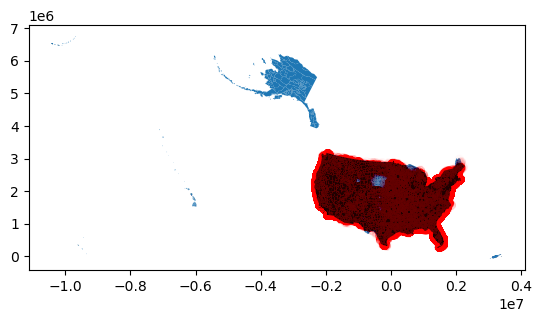

In [30]:
# Let's see if the geometry makes sense
fig, ax = plt.subplots()
gdf_epa.plot(ax=ax)
gdf_kaggle_converted.plot(ax=ax, color="red", alpha=0.005)
plt.show()

### Aggregating crashes by census block group

Using spatial join, we figure out which crashes from the Kaggle data set occurred in which census block group.
Then, we can aggregate by census block group.

In [31]:
# Create a dataframe with only census block group geometry
gdf_cbg = gdf_epa_trimmed[["geometry"]]
gdf_cbg

,geometry
0,"MULTIPOLYGON (((-68983.316 1091325.734, -68981..."
4,"MULTIPOLYGON (((-68980.363 1090202.6, -68965.2..."
5,"MULTIPOLYGON (((-68220.832 1090828.166, -68198..."
6,"MULTIPOLYGON (((-64915.414 1072849.198, -64911..."
7,"MULTIPOLYGON (((-70884.46 1083187.481, -70884...."
...,...
217734,"MULTIPOLYGON (((-838700.534 2248815.049, -8386..."
217735,"MULTIPOLYGON (((-841140.184 2250371.513, -8411..."
217736,"MULTIPOLYGON (((-839920.23 2249768.906, -83990..."
217737,"MULTIPOLYGON (((-979542.464 2354859.671, -9795..."


In [32]:
# Spatial join, keeping CBG geometry, with duplicates for multiple crashes from Kaggle
gdf_cbg_unaggregated = gdf_cbg.sjoin(gdf_kaggle_converted, how="left")
gdf_cbg_no2020_unaggregated = gdf_cbg.sjoin(gdf_kaggle_no2020_converted, how="left")

gdf_cbg_unaggregated

,geometry,index_right,Start_Lat,Start_Lng,Severity
0,"MULTIPOLYGON (((-68983.316 1091325.734, -68981...",1768671.0,32.886105,-96.741592,2.0
0,"MULTIPOLYGON (((-68983.316 1091325.734, -68981...",1940225.0,32.886105,-96.741592,2.0
0,"MULTIPOLYGON (((-68983.316 1091325.734, -68981...",2013330.0,32.886105,-96.741592,2.0
0,"MULTIPOLYGON (((-68983.316 1091325.734, -68981...",2013333.0,32.886105,-96.741592,2.0
0,"MULTIPOLYGON (((-68983.316 1091325.734, -68981...",1829483.0,32.886105,-96.741592,2.0
...,...,...,...,...,...
217737,"MULTIPOLYGON (((-979542.464 2354859.671, -9795...",3506114.0,43.574743,-108.211668,4.0
217738,"MULTIPOLYGON (((-1063358.245 2388021.681, -106...",7523673.0,43.737362,-108.400895,4.0
217738,"MULTIPOLYGON (((-1063358.245 2388021.681, -106...",7523675.0,43.737362,-108.400895,3.0
217738,"MULTIPOLYGON (((-1063358.245 2388021.681, -106...",3506357.0,43.747577,-108.422334,2.0


In [33]:
# Rename index
gdf_cbg_unaggregated.index.name = "census_block_group"
gdf_cbg_no2020_unaggregated.index.name = "census_block_group"

gdf_cbg_no2020_unaggregated

,geometry,index_right,Start_Lat,Start_Lng,Severity
census_block_group,,,,,
0,"MULTIPOLYGON (((-68983.316 1091325.734, -68981...",4837782.0,32.885824,-96.736816,2.0
0,"MULTIPOLYGON (((-68983.316 1091325.734, -68981...",6278441.0,32.885824,-96.736816,2.0
0,"MULTIPOLYGON (((-68983.316 1091325.734, -68981...",1768671.0,32.886105,-96.741592,2.0
0,"MULTIPOLYGON (((-68983.316 1091325.734, -68981...",1940225.0,32.886105,-96.741592,2.0
0,"MULTIPOLYGON (((-68983.316 1091325.734, -68981...",2013333.0,32.886105,-96.741592,2.0
...,...,...,...,...,...
217737,"MULTIPOLYGON (((-979542.464 2354859.671, -9795...",3506114.0,43.574743,-108.211668,4.0
217738,"MULTIPOLYGON (((-1063358.245 2388021.681, -106...",7523673.0,43.737362,-108.400895,4.0
217738,"MULTIPOLYGON (((-1063358.245 2388021.681, -106...",7523675.0,43.737362,-108.400895,3.0


In [34]:
# Drop unnecessary rows
df_cbg_unaggregated = pd.DataFrame(gdf_cbg_unaggregated.drop(columns=["geometry","index_right", "Start_Lat", "Start_Lng"]))
df_cbg_no2020_unaggregated = pd.DataFrame(gdf_cbg_no2020_unaggregated.drop(columns=["geometry","index_right", "Start_Lat", "Start_Lng"]))

df_cbg_unaggregated

,Severity
census_block_group,
0,2.0
0,2.0
0,2.0
0,2.0
0,2.0
...,...
217737,4.0
217738,4.0
217738,3.0


In [35]:
# Aggregate by geometry, summing up the severities of crashes (so a crash with severity n is weighted as "n crashes")
df_cbg_aggregated = df_cbg_unaggregated.groupby(by="census_block_group").sum()
df_cbg_no2020_aggregated = df_cbg_no2020_unaggregated.groupby(by="census_block_group").sum()
df_cbg_aggregated = df_cbg_aggregated.rename(columns={"Severity": "weighted_crashes"})
df_cbg_no2020_aggregated = df_cbg_no2020_aggregated.rename(columns={"Severity": "weighted_crashes"})

df_cbg_aggregated

,weighted_crashes
census_block_group,
0,133.0
4,40.0
5,209.0
6,59.0
7,22.0
...,...
217734,0.0
217735,0.0
217736,0.0


In [36]:
# We saw before that most crashes have severity 2, so we should normalize such that severity 2 is 1 standard crash
# severity 1 = 0.5 standard crashes
# severity 2 = 1 standard crash
# severity 3 = 1.5 standard crashes
# severity 4 = 2 standard crashes
# It's arbitrary, but the documentation of the Kaggle data set doesn't sufficiently explain the "severity" measure, so this is good enough
df_cbg_aggregated["weighted_crashes"] = df_cbg_aggregated["weighted_crashes"] / 2
df_cbg_no2020_aggregated["weighted_crashes"] = df_cbg_no2020_aggregated["weighted_crashes"] / 2

df_cbg_no2020_aggregated

,weighted_crashes
census_block_group,
0,59.5
4,17.0
5,92.5
6,25.5
7,11.0
...,...
217734,0.0
217735,0.0
217736,0.0


### Merging the EPA data with the aggregated crash data

Now we can join the EPA data with the aggregated crash data.

#### Version 1, with problematic values

We will keep a minimally altered version, keeping the problematic values.

In [37]:
# Version 1, containing rows with problematic values

# Rename index
gdf_epa_trimmed.index.name = "census_block_group"

# Merge by "census_block_group"
gdf_combined = gdf_epa_trimmed.join(other=df_cbg_aggregated, how="left")
gdf_combined_no2020 = gdf_epa_trimmed.join(other=df_cbg_no2020_aggregated, how="left")

gdf_combined

,STATEFP,COUNTYFP,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,...,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,geometry,weighted_crashes
census_block_group,,,,,,,,,,,,,,,,,,,,,
0,48,113,73.595028,0.000000,73.595028,73.595028,1202,460.0,423.0,0.549,...,0.137707,6.0,14.0,15.0,17.0,14.000000,3110.360820,2.978361e+05,"MULTIPOLYGON (((-68983.316 1091325.734, -68981...",66.5
4,48,113,169.927211,0.000000,169.927211,148.742920,948,343.0,343.0,0.506,...,0.125296,4.0,7.0,11.0,14.0,10.166667,3731.971773,6.876848e+05,"MULTIPOLYGON (((-68980.363 1090202.6, -68965.2...",20.0
5,48,113,50.687129,0.000000,50.687129,50.687130,1336,556.0,497.0,0.588,...,0.135336,1.0,4.0,5.0,13.0,6.833333,3109.651786,2.051268e+05,"MULTIPOLYGON (((-68220.832 1090828.166, -68198...",104.5
6,48,113,200.640752,0.000000,200.640752,200.640752,1541,451.0,368.0,0.644,...,0.053166,1.0,1.0,10.0,13.0,8.000000,4345.799339,8.119811e+05,"MULTIPOLYGON (((-64915.414 1072849.198, -64911...",29.5
7,48,113,63.992475,0.000000,63.992475,63.992475,583,255.0,255.0,0.690,...,0.298647,9.0,12.0,13.0,16.0,13.166667,2248.148479,2.589736e+05,"MULTIPOLYGON (((-70884.46 1083187.481, -70884....",11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217734,56,025,193.420737,0.000000,193.420737,185.670240,1251,588.0,557.0,0.580,...,-99999.000000,3.0,8.0,17.0,1.0,7.833333,4552.814772,7.827653e+05,"MULTIPOLYGON (((-838700.534 2248815.049, -8386...",0.0
217735,56,025,495.303549,44.102902,451.200646,376.627030,1292,501.0,473.0,0.593,...,-99999.000000,16.0,18.0,13.0,1.0,10.333333,7737.052515,2.004467e+06,"MULTIPOLYGON (((-841140.184 2250371.513, -8411...",0.0
217736,56,025,126.513965,0.000000,126.513965,123.144540,1055,456.0,456.0,0.596,...,-99999.000000,12.0,15.0,18.0,1.0,10.833333,3426.713295,5.119923e+05,"MULTIPOLYGON (((-839920.23 2249768.906, -83990...",0.0


In [38]:
gdf_combined["weighted_crashes"].describe()

count    184511.000000
mean         40.488499
std         141.334144
min           0.000000
25%           0.000000
50%           3.000000
75%          22.000000
max        9524.500000
Name: weighted_crashes, dtype: float64

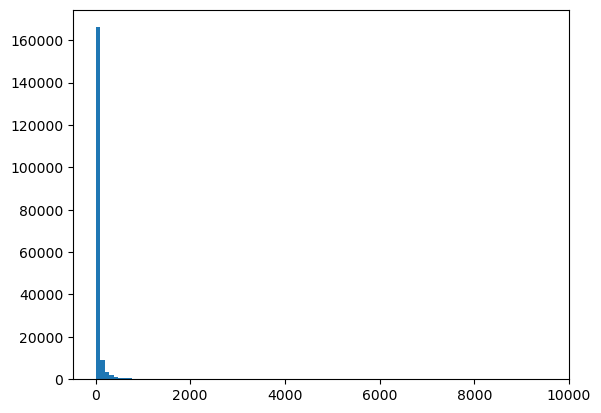

In [39]:
n_bins = 100
plt.hist(gdf_combined["weighted_crashes"], bins=n_bins)
plt.show()

We might want to get rid of rows with too few crashes.
- The Kaggle data set covers the years 2016-2023, so if there are almost no crashes over all those years, then that census block group is probably too inactive to be useful.
- Let's create a version getting rid of rows with 3 severity-weighted crashes or less.

In [40]:
gdf_combined_gt3crashes = gdf_combined[gdf_combined["weighted_crashes"] > 3] # "gt3crashes" = greater than 3 crashes
gdf_combined_no2020_gt3crashes = gdf_combined_no2020[gdf_combined_no2020["weighted_crashes"] > 3]

gdf_combined_gt3crashes["weighted_crashes"].describe()

count    88928.000000
mean        83.304842
std        194.694427
min          3.500000
25%          9.000000
50%         24.000000
75%         75.500000
max       9524.500000
Name: weighted_crashes, dtype: float64

As elucidated by Olti's data visualizations and exploratory data analysis, we want to perform a few transformations on the outcome variable.
- So far, `weighted_crashes` is simply severity-weighted crashes.
- However, we should also control for the population density of the corresponding CBG.
- Furthermore, since the crashes are so right-skewed (with most CBGs having nearly zero crashes, with a long right tail), we should also log-normalize the outcome variable.

In [41]:
# To prevent dividing by zero, we need to make sure the population density `D1B` is positive.
# Furthermore, we don't want to use zero as an input into the logarithm, so we must get of CBGs with zero crashes.

gdf_combined = gdf_combined[(gdf_combined["D1B"] > 0)
                            & (gdf_combined["weighted_crashes"] > 0)]
gdf_combined_no2020 = gdf_combined_no2020[(gdf_combined_no2020["D1B"] > 0)
                                          & (gdf_combined_no2020["weighted_crashes"] > 0)]
gdf_combined_gt3crashes = gdf_combined_gt3crashes[gdf_combined_gt3crashes["D1B"] > 0]
gdf_combined_no2020_gt3crashes = gdf_combined_no2020_gt3crashes[gdf_combined_no2020_gt3crashes["D1B"] > 0]

gdf_combined

,STATEFP,COUNTYFP,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,...,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,geometry,weighted_crashes
census_block_group,,,,,,,,,,,,,,,,,,,,,
0,48,113,73.595028,0.000000,73.595028,73.595028,1202,460.0,423.0,0.549,...,0.137707,6.0,14.0,15.0,17.0,14.000000,3110.360820,2.978361e+05,"MULTIPOLYGON (((-68983.316 1091325.734, -68981...",66.5
4,48,113,169.927211,0.000000,169.927211,148.742920,948,343.0,343.0,0.506,...,0.125296,4.0,7.0,11.0,14.0,10.166667,3731.971773,6.876848e+05,"MULTIPOLYGON (((-68980.363 1090202.6, -68965.2...",20.0
5,48,113,50.687129,0.000000,50.687129,50.687130,1336,556.0,497.0,0.588,...,0.135336,1.0,4.0,5.0,13.0,6.833333,3109.651786,2.051268e+05,"MULTIPOLYGON (((-68220.832 1090828.166, -68198...",104.5
6,48,113,200.640752,0.000000,200.640752,200.640752,1541,451.0,368.0,0.644,...,0.053166,1.0,1.0,10.0,13.0,8.000000,4345.799339,8.119811e+05,"MULTIPOLYGON (((-64915.414 1072849.198, -64911...",29.5
7,48,113,63.992475,0.000000,63.992475,63.992475,583,255.0,255.0,0.690,...,0.298647,9.0,12.0,13.0,16.0,13.166667,2248.148479,2.589736e+05,"MULTIPOLYGON (((-70884.46 1083187.481, -70884....",11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217728,56,021,467.155399,0.000000,467.155399,467.155399,2670,1074.0,999.0,0.569,...,-99999.000000,12.0,20.0,12.0,1.0,9.666667,5964.471692,1.890556e+06,"MULTIPOLYGON (((-732429.599 2046280.092, -7322...",6.0
217729,56,023,19813.190883,595.176921,19218.013963,16524.864330,1607,959.0,663.0,0.749,...,-99999.000000,14.0,14.0,4.0,1.0,6.333333,55305.320701,8.018287e+07,"MULTIPOLYGON (((-1212153.091 2335867.394, -121...",4.0
217733,56,025,103.712565,0.000000,103.712565,98.471380,645,403.0,279.0,0.629,...,-99999.000000,14.0,16.0,19.0,1.0,11.666667,3069.321823,4.197148e+05,"MULTIPOLYGON (((-838389.049 2250072.553, -8383...",1.0


In [42]:
gdf_combined["weighted_crashes"].describe()

count    125297.000000
mean         59.622924
std         168.150780
min           0.500000
25%           3.000000
50%          10.000000
75%          45.500000
max        9524.500000
Name: weighted_crashes, dtype: float64

In [43]:
# Create new outcome variable
gdf_combined["log_crash_per_density"] = np.log10(gdf_combined["weighted_crashes"] / gdf_combined["D1B"])
gdf_combined_no2020["log_crash_per_density"] = np.log10(gdf_combined_no2020["weighted_crashes"] / gdf_combined_no2020["D1B"])
gdf_combined_gt3crashes["log_crash_per_density"] = np.log10(gdf_combined_gt3crashes["weighted_crashes"] / gdf_combined_gt3crashes["D1B"])
gdf_combined_no2020_gt3crashes["log_crash_per_density"] = np.log10(gdf_combined_no2020_gt3crashes["weighted_crashes"] / gdf_combined_no2020_gt3crashes["D1B"])

# Delete old outcome variable
gdf_combined = gdf_combined.drop(columns="weighted_crashes")
gdf_combined_no2020 = gdf_combined_no2020.drop(columns="weighted_crashes")
gdf_combined_gt3crashes = gdf_combined_gt3crashes.drop(columns="weighted_crashes")
gdf_combined_no2020_gt3crashes = gdf_combined_no2020_gt3crashes.drop(columns="weighted_crashes")

gdf_combined

/Users/Arthur/brew/Caskroom/miniforge/base/envs/built-environment/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


,STATEFP,COUNTYFP,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,...,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,geometry,log_crash_per_density
census_block_group,,,,,,,,,,,,,,,,,,,,,
0,48,113,73.595028,0.000000,73.595028,73.595028,1202,460.0,423.0,0.549,...,0.137707,6.0,14.0,15.0,17.0,14.000000,3110.360820,2.978361e+05,"MULTIPOLYGON (((-68983.316 1091325.734, -68981...",0.609766
4,48,113,169.927211,0.000000,169.927211,148.742920,948,343.0,343.0,0.506,...,0.125296,4.0,7.0,11.0,14.0,10.166667,3731.971773,6.876848e+05,"MULTIPOLYGON (((-68980.363 1090202.6, -68965.2...",0.496658
5,48,113,50.687129,0.000000,50.687129,50.687130,1336,556.0,497.0,0.588,...,0.135336,1.0,4.0,5.0,13.0,6.833333,3109.651786,2.051268e+05,"MULTIPOLYGON (((-68220.832 1090828.166, -68198...",0.598208
6,48,113,200.640752,0.000000,200.640752,200.640752,1541,451.0,368.0,0.644,...,0.053166,1.0,1.0,10.0,13.0,8.000000,4345.799339,8.119811e+05,"MULTIPOLYGON (((-64915.414 1072849.198, -64911...",0.584439
7,48,113,63.992475,0.000000,63.992475,63.992475,583,255.0,255.0,0.690,...,0.298647,9.0,12.0,13.0,16.0,13.166667,2248.148479,2.589736e+05,"MULTIPOLYGON (((-70884.46 1083187.481, -70884....",0.081853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217728,56,021,467.155399,0.000000,467.155399,467.155399,2670,1074.0,999.0,0.569,...,-99999.000000,12.0,20.0,12.0,1.0,9.666667,5964.471692,1.890556e+06,"MULTIPOLYGON (((-732429.599 2046280.092, -7322...",0.021101
217729,56,023,19813.190883,595.176921,19218.013963,16524.864330,1607,959.0,663.0,0.749,...,-99999.000000,14.0,14.0,4.0,1.0,6.333333,55305.320701,8.018287e+07,"MULTIPOLYGON (((-1212153.091 2335867.394, -121...",1.614182
217733,56,025,103.712565,0.000000,103.712565,98.471380,645,403.0,279.0,0.629,...,-99999.000000,14.0,16.0,19.0,1.0,11.666667,3069.321823,4.197148e+05,"MULTIPOLYGON (((-838389.049 2250072.553, -8383...",-0.816250


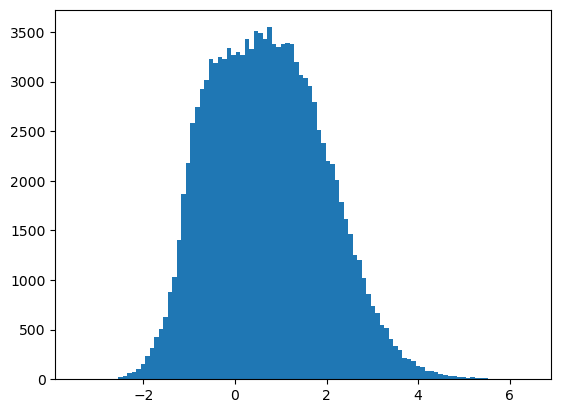

In [44]:
n_bins = 100
plt.hist(gdf_combined["log_crash_per_density"], bins=n_bins)
plt.show()

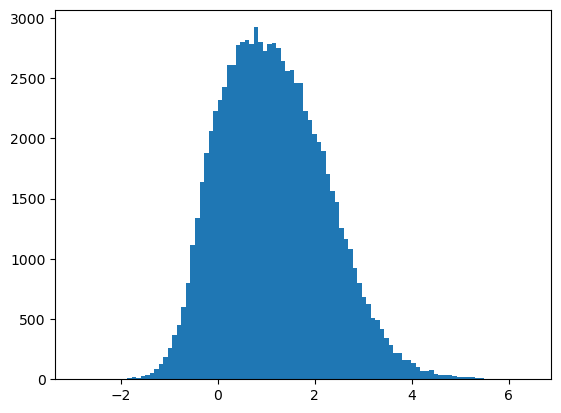

In [45]:
n_bins = 100
plt.hist(gdf_combined_gt3crashes["log_crash_per_density"], bins=n_bins)
plt.show()

In [46]:
# Let's see which columns have lots of -99999 values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display((gdf_combined == -99999).sum())

STATEFP                      0
COUNTYFP                     0
Ac_Total                     0
Ac_Water                     0
Ac_Land                      0
Ac_Unpr                      0
TotPop                       0
CountHU                      0
HH                           0
P_WrkAge                     0
AutoOwn0                     0
Pct_AO0                      0
AutoOwn1                     0
Pct_AO1                      0
AutoOwn2p                    0
Pct_AO2p                     0
Workers                      0
R_LowWageWk                  0
R_MedWageWk                  0
R_HiWageWk                   0
R_PCTLOWWAGE                 0
TotEmp                       0
E5_Ret                       0
E5_Off                       0
E5_Ind                       0
E5_Svc                       0
E5_Ent                       0
E8_Ret                       0
E8_off                       0
E8_Ind                       0
E8_Svc                       0
E8_Ent                       0
E8_Ed   

We'll keep the geodataframe for geospatial data visualization, but we also want a Pandas dataframe without geometry for training our models.

In [47]:
# Remove geometry and turn back into Pandas DF
df_combined = pd.DataFrame(gdf_combined.drop(columns=["geometry", "STATEFP", "COUNTYFP"]))
df_combined_gt3crashes = pd.DataFrame(gdf_combined_gt3crashes.drop(columns=["geometry", "STATEFP", "COUNTYFP"]))
df_combined_no2020 = pd.DataFrame(gdf_combined_no2020.drop(columns=["geometry", "STATEFP", "COUNTYFP"]))
df_combined_no2020_gt3crashes = pd.DataFrame(gdf_combined_no2020_gt3crashes.drop(columns=["geometry", "STATEFP", "COUNTYFP"]))

df_combined

,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,AutoOwn0,Pct_AO0,...,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,log_crash_per_density
census_block_group,,,,,,,,,,,,,,,,,,,,,
0,73.595028,0.000000,73.595028,73.595028,1202,460.0,423.0,0.549,69,0.163121,...,0.000476,0.137707,6.0,14.0,15.0,17.0,14.000000,3110.360820,2.978361e+05,0.609766
4,169.927211,0.000000,169.927211,148.742920,948,343.0,343.0,0.506,5,0.014577,...,0.000433,0.125296,4.0,7.0,11.0,14.0,10.166667,3731.971773,6.876848e+05,0.496658
5,50.687129,0.000000,50.687129,50.687130,1336,556.0,497.0,0.588,33,0.066398,...,0.000467,0.135336,1.0,4.0,5.0,13.0,6.833333,3109.651786,2.051268e+05,0.598208
6,200.640752,0.000000,200.640752,200.640752,1541,451.0,368.0,0.644,11,0.029891,...,0.000184,0.053166,1.0,1.0,10.0,13.0,8.000000,4345.799339,8.119811e+05,0.584439
7,63.992475,0.000000,63.992475,63.992475,583,255.0,255.0,0.690,37,0.145098,...,0.001031,0.298647,9.0,12.0,13.0,16.0,13.166667,2248.148479,2.589736e+05,0.081853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217728,467.155399,0.000000,467.155399,467.155399,2670,1074.0,999.0,0.569,50,0.050050,...,-99999.000000,-99999.000000,12.0,20.0,12.0,1.0,9.666667,5964.471692,1.890556e+06,0.021101
217729,19813.190883,595.176921,19218.013963,16524.864330,1607,959.0,663.0,0.749,8,0.012066,...,-99999.000000,-99999.000000,14.0,14.0,4.0,1.0,6.333333,55305.320701,8.018287e+07,1.614182
217733,103.712565,0.000000,103.712565,98.471380,645,403.0,279.0,0.629,21,0.075269,...,-99999.000000,-99999.000000,14.0,16.0,19.0,1.0,11.666667,3069.321823,4.197148e+05,-0.816250


#### Version 2, eliminating problematic rows

We will make a version where we delete problematic rows.

In [48]:
# Version 2, where problematic rows were eliminated

# Rename index
gdf_epa_trimmed2.index.name = "census_block_group"

# Merge by "census_block_group"
gdf_combined2 = gdf_epa_trimmed2.join(other=df_cbg_aggregated, how="left")
gdf_combined2_no2020 = gdf_epa_trimmed2.join(other=df_cbg_no2020_aggregated, how="left")

# Get rid of rows with too few crashes
gdf_combined2_gt3crashes = gdf_combined2[gdf_combined2["weighted_crashes"] > 3]
gdf_combined2_no2020_gt3crashes = gdf_combined2_no2020[gdf_combined2_no2020["weighted_crashes"] > 3]

# To prevent dividing by zero, we need to make sure the population density `D1B` is positive.
# Furthermore, we don't want to use zero as an input into the logarithm, so we must get of CBGs with zero crashes.
gdf_combined2 = gdf_combined2[(gdf_combined2["D1B"] > 0)
                            & (gdf_combined2["weighted_crashes"] > 0)]
gdf_combined2_no2020 = gdf_combined2_no2020[(gdf_combined2_no2020["D1B"] > 0)
                                          & (gdf_combined2_no2020["weighted_crashes"] > 0)]
gdf_combined2_gt3crashes = gdf_combined2_gt3crashes[gdf_combined2_gt3crashes["D1B"] > 0]
gdf_combined2_no2020_gt3crashes = gdf_combined2_no2020_gt3crashes[gdf_combined2_no2020_gt3crashes["D1B"] > 0]

# Create new outcome variable by dividing by population density, then log-normalizing 
gdf_combined2["log_crash_per_density"] = np.log10(gdf_combined2["weighted_crashes"] / gdf_combined2["D1B"])
gdf_combined2_no2020["log_crash_per_density"] = np.log10(gdf_combined2_no2020["weighted_crashes"] / gdf_combined2_no2020["D1B"])
gdf_combined2_gt3crashes["log_crash_per_density"] = np.log10(gdf_combined2_gt3crashes["weighted_crashes"] / gdf_combined2_gt3crashes["D1B"])
gdf_combined2_no2020_gt3crashes["log_crash_per_density"] = np.log10(gdf_combined2_no2020_gt3crashes["weighted_crashes"] / gdf_combined2_no2020_gt3crashes["D1B"])

# Delete old outcome variable
gdf_combined2 = gdf_combined2.drop(columns="weighted_crashes")
gdf_combined2_no2020 = gdf_combined2_no2020.drop(columns="weighted_crashes")
gdf_combined2_gt3crashes = gdf_combined2_gt3crashes.drop(columns="weighted_crashes")
gdf_combined2_no2020_gt3crashes = gdf_combined2_no2020_gt3crashes.drop(columns="weighted_crashes")

gdf_combined2

,STATEFP,COUNTYFP,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,...,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,geometry,log_crash_per_density
census_block_group,,,,,,,,,,,,,,,,,,,,,
0,48,113,73.595028,0.000000,73.595028,73.595028,1202,460.0,423.0,0.549,...,0.137707,6.0,14.0,15.0,17.0,14.000000,3110.360820,2.978361e+05,"MULTIPOLYGON (((-68983.316 1091325.734, -68981...",0.609766
4,48,113,169.927211,0.000000,169.927211,148.742920,948,343.0,343.0,0.506,...,0.125296,4.0,7.0,11.0,14.0,10.166667,3731.971773,6.876848e+05,"MULTIPOLYGON (((-68980.363 1090202.6, -68965.2...",0.496658
5,48,113,50.687129,0.000000,50.687129,50.687130,1336,556.0,497.0,0.588,...,0.135336,1.0,4.0,5.0,13.0,6.833333,3109.651786,2.051268e+05,"MULTIPOLYGON (((-68220.832 1090828.166, -68198...",0.598208
6,48,113,200.640752,0.000000,200.640752,200.640752,1541,451.0,368.0,0.644,...,0.053166,1.0,1.0,10.0,13.0,8.000000,4345.799339,8.119811e+05,"MULTIPOLYGON (((-64915.414 1072849.198, -64911...",0.584439
7,48,113,63.992475,0.000000,63.992475,63.992475,583,255.0,255.0,0.690,...,0.298647,9.0,12.0,13.0,16.0,13.166667,2248.148479,2.589736e+05,"MULTIPOLYGON (((-70884.46 1083187.481, -70884....",0.081853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217120,55,079,55.716602,0.000000,55.716602,55.716602,522,258.0,188.0,0.626,...,0.717927,5.0,3.0,18.0,19.0,13.666667,1928.076173,2.254831e+05,"MULTIPOLYGON (((653222.115 2258063.153, 653213...",0.942128
217121,55,079,57.117659,0.000000,57.117659,57.117659,462,226.0,147.0,0.487,...,0.691111,7.0,9.0,9.0,18.0,11.666667,1947.684764,2.311520e+05,"MULTIPOLYGON (((653253.636 2257655.763, 653243...",0.836421
217122,55,079,51.608565,0.000000,51.608565,51.608565,751,342.0,282.0,0.499,...,0.592988,11.0,4.0,19.0,20.0,15.500000,1849.477397,2.088565e+05,"MULTIPOLYGON (((652702.355 2258028.663, 652693...",-0.560858


In [49]:
# Let's see which columns have lots of -99999 values
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display((gdf_combined2 == -99999).sum())

STATEFP                  0
COUNTYFP                 0
Ac_Total                 0
Ac_Water                 0
Ac_Land                  0
Ac_Unpr                  0
TotPop                   0
CountHU                  0
HH                       0
P_WrkAge                 0
AutoOwn0                 0
Pct_AO0                  0
AutoOwn1                 0
Pct_AO1                  0
AutoOwn2p                0
Pct_AO2p                 0
Workers                  0
R_LowWageWk              0
R_MedWageWk              0
R_HiWageWk               0
R_PCTLOWWAGE             0
TotEmp                   0
E5_Ret                   0
E5_Off                   0
E5_Ind                   0
E5_Svc                   0
E5_Ent                   0
E8_Ret                   0
E8_off                   0
E8_Ind                   0
E8_Svc                   0
E8_Ent                   0
E8_Ed                    0
E8_Hlth                  0
E8_Pub                   0
E_LowWageWk              0
E_MedWageWk              0
E

In [50]:
# Remove geometry and turn back into Pandas DF
df_combined2 = pd.DataFrame(gdf_combined2.drop(columns=["geometry", "STATEFP", "COUNTYFP"]))
df_combined2_gt3crashes = pd.DataFrame(gdf_combined2_gt3crashes.drop(columns=["geometry", "STATEFP", "COUNTYFP"]))
df_combined2_no2020 = pd.DataFrame(gdf_combined2_no2020.drop(columns=["geometry", "STATEFP", "COUNTYFP"]))
df_combined2_no2020_gt3crashes = pd.DataFrame(gdf_combined2_no2020_gt3crashes.drop(columns=["geometry", "STATEFP", "COUNTYFP"]))

df_combined2

,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,AutoOwn0,Pct_AO0,...,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,log_crash_per_density
census_block_group,,,,,,,,,,,,,,,,,,,,,
0,73.595028,0.000000,73.595028,73.595028,1202,460.0,423.0,0.549,69,0.163121,...,0.000476,0.137707,6.0,14.0,15.0,17.0,14.000000,3110.360820,2.978361e+05,0.609766
4,169.927211,0.000000,169.927211,148.742920,948,343.0,343.0,0.506,5,0.014577,...,0.000433,0.125296,4.0,7.0,11.0,14.0,10.166667,3731.971773,6.876848e+05,0.496658
5,50.687129,0.000000,50.687129,50.687130,1336,556.0,497.0,0.588,33,0.066398,...,0.000467,0.135336,1.0,4.0,5.0,13.0,6.833333,3109.651786,2.051268e+05,0.598208
6,200.640752,0.000000,200.640752,200.640752,1541,451.0,368.0,0.644,11,0.029891,...,0.000184,0.053166,1.0,1.0,10.0,13.0,8.000000,4345.799339,8.119811e+05,0.584439
7,63.992475,0.000000,63.992475,63.992475,583,255.0,255.0,0.690,37,0.145098,...,0.001031,0.298647,9.0,12.0,13.0,16.0,13.166667,2248.148479,2.589736e+05,0.081853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217120,55.716602,0.000000,55.716602,55.716602,522,258.0,188.0,0.626,92,0.489362,...,0.001729,0.717927,5.0,3.0,18.0,19.0,13.666667,1928.076173,2.254831e+05,0.942128
217121,57.117659,0.000000,57.117659,57.117659,462,226.0,147.0,0.487,48,0.326531,...,0.001664,0.691111,7.0,9.0,9.0,18.0,11.666667,1947.684764,2.311520e+05,0.836421
217122,51.608565,0.000000,51.608565,51.608565,751,342.0,282.0,0.499,116,0.411348,...,0.001428,0.592988,11.0,4.0,19.0,20.0,15.500000,1849.477397,2.088565e+05,-0.560858


#### Version 3, eliminating problematics columns

Now we'll create a version getting rid of the problematic columns.

In [51]:
# Version 3, where problematic columns were eliminated

# Rename index
gdf_epa_trimmed3.index.name = "census_block_group"

# Merge by "census_block_group"
gdf_combined3 = gdf_epa_trimmed3.join(other=df_cbg_aggregated, how="left")
gdf_combined3_no2020 = gdf_epa_trimmed3.join(other=df_cbg_no2020_aggregated, how="left")

# Get rid of rows with too few crashes
gdf_combined3_gt3crashes = gdf_combined3[gdf_combined3["weighted_crashes"] > 3]
gdf_combined3_no2020_gt3crashes = gdf_combined3_no2020[gdf_combined3_no2020["weighted_crashes"] > 3]

# To prevent dividing by zero, we need to make sure the population density `D1B` is positive.
# Furthermore, we don't want to use zero as an input into the logarithm, so we must get of CBGs with zero crashes.
gdf_combined3 = gdf_combined3[(gdf_combined3["D1B"] > 0)
                            & (gdf_combined3["weighted_crashes"] > 0)]
gdf_combined3_no2020 = gdf_combined3_no2020[(gdf_combined3_no2020["D1B"] > 0)
                                          & (gdf_combined3_no2020["weighted_crashes"] > 0)]
gdf_combined3_gt3crashes = gdf_combined3_gt3crashes[gdf_combined3_gt3crashes["D1B"] > 0]
gdf_combined3_no2020_gt3crashes = gdf_combined3_no2020_gt3crashes[gdf_combined3_no2020_gt3crashes["D1B"] > 0]


# Create new outcome variable by dividing by population density, then log-normalizing 
gdf_combined3["log_crash_per_density"] = np.log10(gdf_combined3["weighted_crashes"] / gdf_combined3["D1B"])
gdf_combined3_no2020["log_crash_per_density"] = np.log10(gdf_combined3_no2020["weighted_crashes"] / gdf_combined3_no2020["D1B"])
gdf_combined3_gt3crashes["log_crash_per_density"] = np.log10(gdf_combined3_gt3crashes["weighted_crashes"] / gdf_combined3_gt3crashes["D1B"])
gdf_combined3_no2020_gt3crashes["log_crash_per_density"] = np.log10(gdf_combined3_no2020_gt3crashes["weighted_crashes"] / gdf_combined3_no2020_gt3crashes["D1B"])

# Delete old outcome variable
gdf_combined3 = gdf_combined3.drop(columns="weighted_crashes")
gdf_combined3_no2020 = gdf_combined3_no2020.drop(columns="weighted_crashes")
gdf_combined3_gt3crashes = gdf_combined3_gt3crashes.drop(columns="weighted_crashes")
gdf_combined3_no2020_gt3crashes = gdf_combined3_no2020_gt3crashes.drop(columns="weighted_crashes")

gdf_combined3


,STATEFP,COUNTYFP,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,...,D5CEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,geometry,log_crash_per_density
census_block_group,,,,,,,,,,,,,,,,,,,,,
0,48,113,73.595028,0.000000,73.595028,73.595028,1202,460.0,423.0,0.549,...,0.841299,6.0,14.0,15.0,17.0,14.000000,3110.360820,2.978361e+05,"MULTIPOLYGON (((-68983.316 1091325.734, -68981...",0.609766
4,48,113,169.927211,0.000000,169.927211,148.742920,948,343.0,343.0,0.506,...,0.659846,4.0,7.0,11.0,14.0,10.166667,3731.971773,6.876848e+05,"MULTIPOLYGON (((-68980.363 1090202.6, -68965.2...",0.496658
5,48,113,50.687129,0.000000,50.687129,50.687130,1336,556.0,497.0,0.588,...,0.802364,1.0,4.0,5.0,13.0,6.833333,3109.651786,2.051268e+05,"MULTIPOLYGON (((-68220.832 1090828.166, -68198...",0.598208
6,48,113,200.640752,0.000000,200.640752,200.640752,1541,451.0,368.0,0.644,...,0.569870,1.0,1.0,10.0,13.0,8.000000,4345.799339,8.119811e+05,"MULTIPOLYGON (((-64915.414 1072849.198, -64911...",0.584439
7,48,113,63.992475,0.000000,63.992475,63.992475,583,255.0,255.0,0.690,...,0.704930,9.0,12.0,13.0,16.0,13.166667,2248.148479,2.589736e+05,"MULTIPOLYGON (((-70884.46 1083187.481, -70884....",0.081853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217728,56,021,467.155399,0.000000,467.155399,467.155399,2670,1074.0,999.0,0.569,...,0.822714,12.0,20.0,12.0,1.0,9.666667,5964.471692,1.890556e+06,"MULTIPOLYGON (((-732429.599 2046280.092, -7322...",0.021101
217729,56,023,19813.190883,595.176921,19218.013963,16524.864330,1607,959.0,663.0,0.749,...,0.000000,14.0,14.0,4.0,1.0,6.333333,55305.320701,8.018287e+07,"MULTIPOLYGON (((-1212153.091 2335867.394, -121...",1.614182
217733,56,025,103.712565,0.000000,103.712565,98.471380,645,403.0,279.0,0.629,...,0.914113,14.0,16.0,19.0,1.0,11.666667,3069.321823,4.197148e+05,"MULTIPOLYGON (((-838389.049 2250072.553, -8383...",-0.816250


In [52]:
# Remove geometry and turn back into Pandas DF
df_combined3 = pd.DataFrame(gdf_combined3.drop(columns=["geometry", "STATEFP", "COUNTYFP"]))
df_combined3_gt3crashes = pd.DataFrame(gdf_combined3_gt3crashes.drop(columns=["geometry", "STATEFP", "COUNTYFP"]))
df_combined3_no2020 = pd.DataFrame(gdf_combined3_no2020.drop(columns=["geometry", "STATEFP", "COUNTYFP"]))
df_combined3_no2020_gt3crashes = pd.DataFrame(gdf_combined3_no2020_gt3crashes.drop(columns=["geometry", "STATEFP", "COUNTYFP"]))

df_combined3

,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,AutoOwn0,Pct_AO0,...,D5CE,D5CEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,log_crash_per_density
census_block_group,,,,,,,,,,,,,,,,,,,,,
0,73.595028,0.000000,73.595028,73.595028,1202,460.0,423.0,0.549,69,0.163121,...,0.000358,0.841299,6.0,14.0,15.0,17.0,14.000000,3110.360820,2.978361e+05,0.609766
4,169.927211,0.000000,169.927211,148.742920,948,343.0,343.0,0.506,5,0.014577,...,0.000281,0.659846,4.0,7.0,11.0,14.0,10.166667,3731.971773,6.876848e+05,0.496658
5,50.687129,0.000000,50.687129,50.687130,1336,556.0,497.0,0.588,33,0.066398,...,0.000341,0.802364,1.0,4.0,5.0,13.0,6.833333,3109.651786,2.051268e+05,0.598208
6,200.640752,0.000000,200.640752,200.640752,1541,451.0,368.0,0.644,11,0.029891,...,0.000242,0.569870,1.0,1.0,10.0,13.0,8.000000,4345.799339,8.119811e+05,0.584439
7,63.992475,0.000000,63.992475,63.992475,583,255.0,255.0,0.690,37,0.145098,...,0.000300,0.704930,9.0,12.0,13.0,16.0,13.166667,2248.148479,2.589736e+05,0.081853
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217728,467.155399,0.000000,467.155399,467.155399,2670,1074.0,999.0,0.569,50,0.050050,...,0.016691,0.822714,12.0,20.0,12.0,1.0,9.666667,5964.471692,1.890556e+06,0.021101
217729,19813.190883,595.176921,19218.013963,16524.864330,1607,959.0,663.0,0.749,8,0.012066,...,0.000000,0.000000,14.0,14.0,4.0,1.0,6.333333,55305.320701,8.018287e+07,1.614182
217733,103.712565,0.000000,103.712565,98.471380,645,403.0,279.0,0.629,21,0.075269,...,0.026799,0.914113,14.0,16.0,19.0,1.0,11.666667,3069.321823,4.197148e+05,-0.816250


## Implementing feature selection and transformations

Based on previous exploratory data analysis and data visualization, we will select the most relevent features, in particular those related to the built environment and urban design. We will also apply appropriate transformations to some features.

In [53]:
# Version 1

df_combined = df_combined[['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density']]
df_combined['CountHU'] = np.log10(df_combined['CountHU'])
df_combined['Pct_AO0'] = np.log10(df_combined['Pct_AO0'] + 1e-3)
df_combined['D3A'] = np.log10(df_combined['D3A'])
df_combined['D3AAO'] = np.log10(df_combined['D3AAO'] + 1e-3)
df_combined['D3AMM'] = np.log10(df_combined['D3AMM'] + 1e-3)
df_combined['D3BAO'] = np.log10(df_combined['D3BAO'] + 1e-2)
df_combined['D3BMM3'] = np.log10(df_combined['D3BMM3'] + 1e-2)
df_combined['D3BMM4'] = np.log10(df_combined['D3BMM4'] + 1e-2)

df_combined_gt3crashes = df_combined_gt3crashes[['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density']]
df_combined_gt3crashes['CountHU'] = np.log10(df_combined_gt3crashes['CountHU'])
df_combined_gt3crashes['Pct_AO0'] = np.log10(df_combined_gt3crashes['Pct_AO0'] + 1e-3)
df_combined_gt3crashes['D3A'] = np.log10(df_combined_gt3crashes['D3A'])
df_combined_gt3crashes['D3AAO'] = np.log10(df_combined_gt3crashes['D3AAO'] + 1e-3)
df_combined_gt3crashes['D3AMM'] = np.log10(df_combined_gt3crashes['D3AMM'] + 1e-3)
df_combined_gt3crashes['D3BAO'] = np.log10(df_combined_gt3crashes['D3BAO'] + 1e-2)
df_combined_gt3crashes['D3BMM3'] = np.log10(df_combined_gt3crashes['D3BMM3'] + 1e-2)
df_combined_gt3crashes['D3BMM4'] = np.log10(df_combined_gt3crashes['D3BMM4'] + 1e-2)

df_combined_no2020 = df_combined_no2020[['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density']]
df_combined_no2020['CountHU'] = np.log10(df_combined_no2020['CountHU'])
df_combined_no2020['Pct_AO0'] = np.log10(df_combined_no2020['Pct_AO0'] + 1e-3)
df_combined_no2020['D3A'] = np.log10(df_combined_no2020['D3A'])
df_combined_no2020['D3AAO'] = np.log10(df_combined_no2020['D3AAO'] + 1e-3)
df_combined_no2020['D3AMM'] = np.log10(df_combined_no2020['D3AMM'] + 1e-3)
df_combined_no2020['D3BAO'] = np.log10(df_combined_no2020['D3BAO'] + 1e-2)
df_combined_no2020['D3BMM3'] = np.log10(df_combined_no2020['D3BMM3'] + 1e-2)
df_combined_no2020['D3BMM4'] = np.log10(df_combined_no2020['D3BMM4'] + 1e-2)

df_combined_no2020_gt3crashes = df_combined_no2020_gt3crashes[['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density']]
df_combined_no2020_gt3crashes['CountHU'] = np.log10(df_combined_no2020_gt3crashes['CountHU'])
df_combined_no2020_gt3crashes['Pct_AO0'] = np.log10(df_combined_no2020_gt3crashes['Pct_AO0'] + 1e-3)
df_combined_no2020_gt3crashes['D3A'] = np.log10(df_combined_no2020_gt3crashes['D3A'])
df_combined_no2020_gt3crashes['D3AAO'] = np.log10(df_combined_no2020_gt3crashes['D3AAO'] + 1e-3)
df_combined_no2020_gt3crashes['D3AMM'] = np.log10(df_combined_no2020_gt3crashes['D3AMM'] + 1e-3)
df_combined_no2020_gt3crashes['D3BAO'] = np.log10(df_combined_no2020_gt3crashes['D3BAO'] + 1e-2)
df_combined_no2020_gt3crashes['D3BMM3'] = np.log10(df_combined_no2020_gt3crashes['D3BMM3'] + 1e-2)
df_combined_no2020_gt3crashes['D3BMM4'] = np.log10(df_combined_no2020_gt3crashes['D3BMM4'] + 1e-2)

/var/folders/p6/3_xthzsx7kb28k487fkj956h0000gq/T/ipykernel_28704/3580971005.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['CountHU'] = np.log10(df_combined['CountHU'])
/var/folders/p6/3_xthzsx7kb28k487fkj956h0000gq/T/ipykernel_28704/3580971005.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined['Pct_AO0'] = np.log10(df_combined['Pct_AO0'] + 1e-3)
/var/folders/p6/3_xthzsx7kb28k487fkj956h0000gq/T/ipykernel_28704/3580971005.py:8: SettingWithCopyWarning: 
A value is trying to be se

In [54]:
# Do the same for the geodataframes
# Don't forget to keep geometry!!!

gdf_combined = gdf_combined[['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density', 'geometry', 'STATEFP', 'COUNTYFP']]
gdf_combined['CountHU'] = np.log10(gdf_combined['CountHU'])
gdf_combined['Pct_AO0'] = np.log10(gdf_combined['Pct_AO0'] + 1e-3)
gdf_combined['D3A'] = np.log10(gdf_combined['D3A'])
gdf_combined['D3AAO'] = np.log10(gdf_combined['D3AAO'] + 1e-3)
gdf_combined['D3AMM'] = np.log10(gdf_combined['D3AMM'] + 1e-3)
gdf_combined['D3BAO'] = np.log10(gdf_combined['D3BAO'] + 1e-2)
gdf_combined['D3BMM3'] = np.log10(gdf_combined['D3BMM3'] + 1e-2)
gdf_combined['D3BMM4'] = np.log10(gdf_combined['D3BMM4'] + 1e-2)

gdf_combined_gt3crashes = gdf_combined_gt3crashes[['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density', 'geometry', 'STATEFP', 'COUNTYFP']]
gdf_combined_gt3crashes['CountHU'] = np.log10(gdf_combined_gt3crashes['CountHU'])
gdf_combined_gt3crashes['Pct_AO0'] = np.log10(gdf_combined_gt3crashes['Pct_AO0'] + 1e-3)
gdf_combined_gt3crashes['D3A'] = np.log10(gdf_combined_gt3crashes['D3A'])
gdf_combined_gt3crashes['D3AAO'] = np.log10(gdf_combined_gt3crashes['D3AAO'] + 1e-3)
gdf_combined_gt3crashes['D3AMM'] = np.log10(gdf_combined_gt3crashes['D3AMM'] + 1e-3)
gdf_combined_gt3crashes['D3BAO'] = np.log10(gdf_combined_gt3crashes['D3BAO'] + 1e-2)
gdf_combined_gt3crashes['D3BMM3'] = np.log10(gdf_combined_gt3crashes['D3BMM3'] + 1e-2)
gdf_combined_gt3crashes['D3BMM4'] = np.log10(gdf_combined_gt3crashes['D3BMM4'] + 1e-2)

gdf_combined_no2020 = gdf_combined_no2020[['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density', 'geometry', 'STATEFP', 'COUNTYFP']]
gdf_combined_no2020['CountHU'] = np.log10(gdf_combined_no2020['CountHU'])
gdf_combined_no2020['Pct_AO0'] = np.log10(gdf_combined_no2020['Pct_AO0'] + 1e-3)
gdf_combined_no2020['D3A'] = np.log10(gdf_combined_no2020['D3A'])
gdf_combined_no2020['D3AAO'] = np.log10(gdf_combined_no2020['D3AAO'] + 1e-3)
gdf_combined_no2020['D3AMM'] = np.log10(gdf_combined_no2020['D3AMM'] + 1e-3)
gdf_combined_no2020['D3BAO'] = np.log10(gdf_combined_no2020['D3BAO'] + 1e-2)
gdf_combined_no2020['D3BMM3'] = np.log10(gdf_combined_no2020['D3BMM3'] + 1e-2)
gdf_combined_no2020['D3BMM4'] = np.log10(gdf_combined_no2020['D3BMM4'] + 1e-2)

gdf_combined_no2020_gt3crashes = gdf_combined_no2020_gt3crashes[['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density', 'geometry', 'STATEFP', 'COUNTYFP']]
gdf_combined_no2020_gt3crashes['CountHU'] = np.log10(gdf_combined_no2020_gt3crashes['CountHU'])
gdf_combined_no2020_gt3crashes['Pct_AO0'] = np.log10(gdf_combined_no2020_gt3crashes['Pct_AO0'] + 1e-3)
gdf_combined_no2020_gt3crashes['D3A'] = np.log10(gdf_combined_no2020_gt3crashes['D3A'])
gdf_combined_no2020_gt3crashes['D3AAO'] = np.log10(gdf_combined_no2020_gt3crashes['D3AAO'] + 1e-3)
gdf_combined_no2020_gt3crashes['D3AMM'] = np.log10(gdf_combined_no2020_gt3crashes['D3AMM'] + 1e-3)
gdf_combined_no2020_gt3crashes['D3BAO'] = np.log10(gdf_combined_no2020_gt3crashes['D3BAO'] + 1e-2)
gdf_combined_no2020_gt3crashes['D3BMM3'] = np.log10(gdf_combined_no2020_gt3crashes['D3BMM3'] + 1e-2)
gdf_combined_no2020_gt3crashes['D3BMM4'] = np.log10(gdf_combined_no2020_gt3crashes['D3BMM4'] + 1e-2)

/Users/Arthur/brew/Caskroom/miniforge/base/envs/built-environment/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [55]:
# We will skip Version 2, since we never ended up using it

# Version 3

df_combined3 = df_combined3[['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density']]
df_combined3['CountHU'] = np.log10(df_combined3['CountHU'])
df_combined3['Pct_AO0'] = np.log10(df_combined3['Pct_AO0'] + 1e-3)
df_combined3['D3A'] = np.log10(df_combined3['D3A'])
df_combined3['D3AAO'] = np.log10(df_combined3['D3AAO'] + 1e-3)
df_combined3['D3AMM'] = np.log10(df_combined3['D3AMM'] + 1e-3)
df_combined3['D3BAO'] = np.log10(df_combined3['D3BAO'] + 1e-2)
df_combined3['D3BMM3'] = np.log10(df_combined3['D3BMM3'] + 1e-2)
df_combined3['D3BMM4'] = np.log10(df_combined3['D3BMM4'] + 1e-2)

df_combined3_gt3crashes = df_combined3_gt3crashes[['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density']]
df_combined3_gt3crashes['CountHU'] = np.log10(df_combined3_gt3crashes['CountHU'])
df_combined3_gt3crashes['Pct_AO0'] = np.log10(df_combined3_gt3crashes['Pct_AO0'] + 1e-3)
df_combined3_gt3crashes['D3A'] = np.log10(df_combined3_gt3crashes['D3A'])
df_combined3_gt3crashes['D3AAO'] = np.log10(df_combined3_gt3crashes['D3AAO'] + 1e-3)
df_combined3_gt3crashes['D3AMM'] = np.log10(df_combined3_gt3crashes['D3AMM'] + 1e-3)
df_combined3_gt3crashes['D3BAO'] = np.log10(df_combined3_gt3crashes['D3BAO'] + 1e-2)
df_combined3_gt3crashes['D3BMM3'] = np.log10(df_combined3_gt3crashes['D3BMM3'] + 1e-2)
df_combined3_gt3crashes['D3BMM4'] = np.log10(df_combined3_gt3crashes['D3BMM4'] + 1e-2)

df_combined3_no2020 = df_combined3_no2020[['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density']]
df_combined3_no2020['CountHU'] = np.log10(df_combined3_no2020['CountHU'])
df_combined3_no2020['Pct_AO0'] = np.log10(df_combined3_no2020['Pct_AO0'] + 1e-3)
df_combined3_no2020['D3A'] = np.log10(df_combined3_no2020['D3A'])
df_combined3_no2020['D3AAO'] = np.log10(df_combined3_no2020['D3AAO'] + 1e-3)
df_combined3_no2020['D3AMM'] = np.log10(df_combined3_no2020['D3AMM'] + 1e-3)
df_combined3_no2020['D3BAO'] = np.log10(df_combined3_no2020['D3BAO'] + 1e-2)
df_combined3_no2020['D3BMM3'] = np.log10(df_combined3_no2020['D3BMM3'] + 1e-2)
df_combined3_no2020['D3BMM4'] = np.log10(df_combined3_no2020['D3BMM4'] + 1e-2)

df_combined3_no2020_gt3crashes = df_combined3_no2020_gt3crashes[['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density']]
df_combined3_no2020_gt3crashes['CountHU'] = np.log10(df_combined3_no2020_gt3crashes['CountHU'])
df_combined3_no2020_gt3crashes['Pct_AO0'] = np.log10(df_combined3_no2020_gt3crashes['Pct_AO0'] + 1e-3)
df_combined3_no2020_gt3crashes['D3A'] = np.log10(df_combined3_no2020_gt3crashes['D3A'])
df_combined3_no2020_gt3crashes['D3AAO'] = np.log10(df_combined3_no2020_gt3crashes['D3AAO'] + 1e-3)
df_combined3_no2020_gt3crashes['D3AMM'] = np.log10(df_combined3_no2020_gt3crashes['D3AMM'] + 1e-3)
df_combined3_no2020_gt3crashes['D3BAO'] = np.log10(df_combined3_no2020_gt3crashes['D3BAO'] + 1e-2)
df_combined3_no2020_gt3crashes['D3BMM3'] = np.log10(df_combined3_no2020_gt3crashes['D3BMM3'] + 1e-2)
df_combined3_no2020_gt3crashes['D3BMM4'] = np.log10(df_combined3_no2020_gt3crashes['D3BMM4'] + 1e-2)

print(df_combined3_no2020_gt3crashes.columns.tolist())

['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p', 'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025', 'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density']


/var/folders/p6/3_xthzsx7kb28k487fkj956h0000gq/T/ipykernel_28704/3490382149.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined3['CountHU'] = np.log10(df_combined3['CountHU'])
/var/folders/p6/3_xthzsx7kb28k487fkj956h0000gq/T/ipykernel_28704/3490382149.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_combined3['Pct_AO0'] = np.log10(df_combined3['Pct_AO0'] + 1e-3)
/var/folders/p6/3_xthzsx7kb28k487fkj956h0000gq/T/ipykernel_28704/3490382149.py:10: SettingWithCopyWarning: 
A value is trying to 

In [56]:
# Do the same for the geodataframes

gdf_combined3 = gdf_combined3[['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density', 'geometry', 'STATEFP', 'COUNTYFP']]
gdf_combined3['CountHU'] = np.log10(gdf_combined3['CountHU'])
gdf_combined3['Pct_AO0'] = np.log10(gdf_combined3['Pct_AO0'] + 1e-3)
gdf_combined3['D3A'] = np.log10(gdf_combined3['D3A'])
gdf_combined3['D3AAO'] = np.log10(gdf_combined3['D3AAO'] + 1e-3)
gdf_combined3['D3AMM'] = np.log10(gdf_combined3['D3AMM'] + 1e-3)
gdf_combined3['D3BAO'] = np.log10(gdf_combined3['D3BAO'] + 1e-2)
gdf_combined3['D3BMM3'] = np.log10(gdf_combined3['D3BMM3'] + 1e-2)
gdf_combined3['D3BMM4'] = np.log10(gdf_combined3['D3BMM4'] + 1e-2)

gdf_combined3_gt3crashes = gdf_combined3_gt3crashes[['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density', 'geometry', 'STATEFP', 'COUNTYFP']]
gdf_combined3_gt3crashes['CountHU'] = np.log10(gdf_combined3_gt3crashes['CountHU'])
gdf_combined3_gt3crashes['Pct_AO0'] = np.log10(gdf_combined3_gt3crashes['Pct_AO0'] + 1e-3)
gdf_combined3_gt3crashes['D3A'] = np.log10(gdf_combined3_gt3crashes['D3A'])
gdf_combined3_gt3crashes['D3AAO'] = np.log10(gdf_combined3_gt3crashes['D3AAO'] + 1e-3)
gdf_combined3_gt3crashes['D3AMM'] = np.log10(gdf_combined3_gt3crashes['D3AMM'] + 1e-3)
gdf_combined3_gt3crashes['D3BAO'] = np.log10(gdf_combined3_gt3crashes['D3BAO'] + 1e-2)
gdf_combined3_gt3crashes['D3BMM3'] = np.log10(gdf_combined3_gt3crashes['D3BMM3'] + 1e-2)
gdf_combined3_gt3crashes['D3BMM4'] = np.log10(gdf_combined3_gt3crashes['D3BMM4'] + 1e-2)

gdf_combined3_no2020 = gdf_combined3_no2020[['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density', 'geometry', 'STATEFP', 'COUNTYFP']]
gdf_combined3_no2020['CountHU'] = np.log10(gdf_combined3_no2020['CountHU'])
gdf_combined3_no2020['Pct_AO0'] = np.log10(gdf_combined3_no2020['Pct_AO0'] + 1e-3)
gdf_combined3_no2020['D3A'] = np.log10(gdf_combined3_no2020['D3A'])
gdf_combined3_no2020['D3AAO'] = np.log10(gdf_combined3_no2020['D3AAO'] + 1e-3)
gdf_combined3_no2020['D3AMM'] = np.log10(gdf_combined3_no2020['D3AMM'] + 1e-3)
gdf_combined3_no2020['D3BAO'] = np.log10(gdf_combined3_no2020['D3BAO'] + 1e-2)
gdf_combined3_no2020['D3BMM3'] = np.log10(gdf_combined3_no2020['D3BMM3'] + 1e-2)
gdf_combined3_no2020['D3BMM4'] = np.log10(gdf_combined3_no2020['D3BMM4'] + 1e-2)

gdf_combined3_no2020_gt3crashes = gdf_combined3_no2020_gt3crashes[['CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd', 'log_crash_per_density', 'geometry', 'STATEFP', 'COUNTYFP']]
gdf_combined3_no2020_gt3crashes['CountHU'] = np.log10(gdf_combined3_no2020_gt3crashes['CountHU'])
gdf_combined3_no2020_gt3crashes['Pct_AO0'] = np.log10(gdf_combined3_no2020_gt3crashes['Pct_AO0'] + 1e-3)
gdf_combined3_no2020_gt3crashes['D3A'] = np.log10(gdf_combined3_no2020_gt3crashes['D3A'])
gdf_combined3_no2020_gt3crashes['D3AAO'] = np.log10(gdf_combined3_no2020_gt3crashes['D3AAO'] + 1e-3)
gdf_combined3_no2020_gt3crashes['D3AMM'] = np.log10(gdf_combined3_no2020_gt3crashes['D3AMM'] + 1e-3)
gdf_combined3_no2020_gt3crashes['D3BAO'] = np.log10(gdf_combined3_no2020_gt3crashes['D3BAO'] + 1e-2)
gdf_combined3_no2020_gt3crashes['D3BMM3'] = np.log10(gdf_combined3_no2020_gt3crashes['D3BMM3'] + 1e-2)
gdf_combined3_no2020_gt3crashes['D3BMM4'] = np.log10(gdf_combined3_no2020_gt3crashes['D3BMM4'] + 1e-2)

/Users/Arthur/brew/Caskroom/miniforge/base/envs/built-environment/lib/python3.12/site-packages/geopandas/geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


<Axes: >

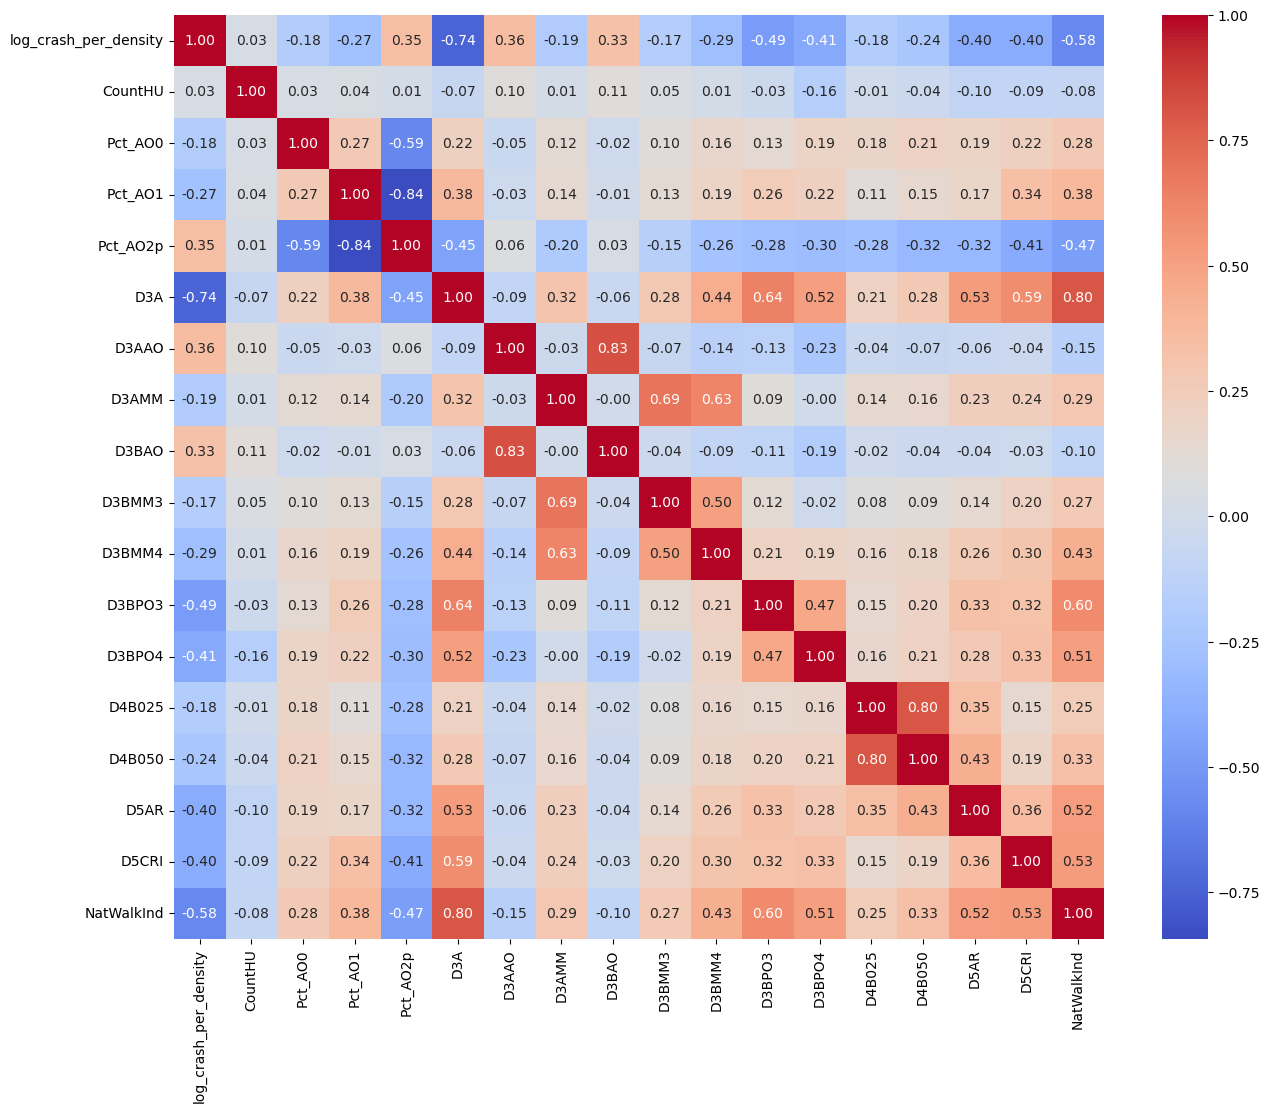

In [57]:
# Let's visualize with a heatmap
import seaborn as sns
corr = df_combined3_no2020_gt3crashes[['log_crash_per_density', 'CountHU', 'Pct_AO0', 'Pct_AO1', 'Pct_AO2p',
          'D3A', 'D3AAO', 'D3AMM', 'D3BAO', 'D3BMM3', 'D3BMM4', 'D3BPO3', 'D3BPO4', 'D4B025',
          'D4B050', 'D5AR', 'D5CRI', 'NatWalkInd']].corr()
plt.figure(figsize = (15,12))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f", )

# Train-test split

We *must* train-test-split before doing anything else.

In [58]:
from sklearn.model_selection import train_test_split

# Version 1
df_1_train, df_1_test = train_test_split(df_combined, test_size=0.2, shuffle=True, random_state=831)
df_1_gt3crashes_train, df_1_gt3crashes_test = train_test_split(df_combined_gt3crashes, test_size=0.2, shuffle=True, random_state=831)
df_1_no2020_train, df_1_no2020_test = train_test_split(df_combined_no2020, test_size=0.2, shuffle=True, random_state=831)
df_1_no2020_gt3crashes_train, df_1_no2020_gt3crashes_test = train_test_split(df_combined_no2020_gt3crashes, test_size=0.2, shuffle=True, random_state=831)

df_1_train

,CountHU,Pct_AO0,Pct_AO1,Pct_AO2p,D3A,D3AAO,D3AMM,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4B025,D4B050,D5AR,D5CRI,NatWalkInd,log_crash_per_density
census_block_group,,,,,,,,,,,,,,,,,,
164079,2.641474,-0.347089,0.510740,0.040573,1.378872,-3.000000,0.487332,-2.000000,-2.000000,1.747841,0.000000,55.945320,0.74087,1.0,532720.0,0.436440,14.666667,-1.720458
211130,2.781037,-3.000000,0.554529,0.445471,1.212853,-3.000000,0.400486,-2.000000,1.197718,0.420941,99.787078,7.877927,0.00000,0.0,13280.0,0.313711,14.000000,-0.646653
77632,2.691965,-3.000000,0.343820,0.656180,0.711358,-0.537999,0.473683,0.381082,1.087198,-0.137603,8.621345,1.676373,0.00000,0.0,4280.0,0.284878,4.166667,1.130608
93605,2.817565,-1.217508,0.529801,0.410596,1.527345,-3.000000,-3.000000,-2.000000,-2.000000,-2.000000,130.372931,130.372931,0.00000,0.0,23199.0,0.956936,10.166667,-1.142719
92067,2.797268,-1.695967,0.076555,0.904306,0.562503,-0.339742,0.375840,-0.741380,0.915761,-0.157658,3.256463,0.171393,0.00000,0.0,17977.0,0.647796,5.666667,1.008410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42252,3.117934,-3.000000,0.110518,0.889482,1.124451,0.218220,0.063699,0.748554,0.991260,0.544899,72.032050,6.294063,0.00000,0.0,12913.0,0.237441,7.333333,-0.883261
48145,2.551450,-1.102182,0.317919,0.604046,1.336783,0.397345,-0.849169,0.872986,-2.000000,-2.000000,234.808718,37.271225,0.00000,0.0,17158.0,0.025068,10.333333,-0.437121
32865,2.767898,-1.498374,0.132007,0.837251,1.276981,-3.000000,0.540337,-2.000000,1.679673,0.901975,83.679649,3.984745,0.00000,0.0,70075.0,0.102380,14.000000,-0.608635


In [59]:
# Don't forget the geodataframes!
gdf_1_train, gdf_1_test = train_test_split(gdf_combined, test_size=0.2, shuffle=True, random_state=831)
gdf_1_gt3crashes_train, gdf_1_gt3crashes_test = train_test_split(gdf_combined_gt3crashes, test_size=0.2, shuffle=True, random_state=831)
gdf_1_no2020_train, gdf_1_no2020_test = train_test_split(gdf_combined_no2020, test_size=0.2, shuffle=True, random_state=831)
gdf_1_no2020_gt3crashes_train, gdf_1_no2020_gt3crashes_test = train_test_split(gdf_combined_no2020_gt3crashes, test_size=0.2, shuffle=True, random_state=831)

gdf_1_train

,CountHU,Pct_AO0,Pct_AO1,Pct_AO2p,D3A,D3AAO,D3AMM,D3BAO,D3BMM3,D3BMM4,...,D3BPO4,D4B025,D4B050,D5AR,D5CRI,NatWalkInd,log_crash_per_density,geometry,STATEFP,COUNTYFP
census_block_group,,,,,,,,,,,,,,,,,,,,,
164079,2.641474,-0.347089,0.510740,0.040573,1.378872,-3.000000,0.487332,-2.000000,-2.000000,1.747841,...,55.945320,0.74087,1.0,532720.0,0.436440,14.666667,-1.720458,"MULTIPOLYGON (((1831604.83 2174512.789, 183187...",36,047
211130,2.781037,-3.000000,0.554529,0.445471,1.212853,-3.000000,0.400486,-2.000000,1.197718,0.420941,...,7.877927,0.00000,0.0,13280.0,0.313711,14.000000,-0.646653,"MULTIPOLYGON (((-2023269.174 2954835.861, -202...",53,067
77632,2.691965,-3.000000,0.343820,0.656180,0.711358,-0.537999,0.473683,0.381082,1.087198,-0.137603,...,1.676373,0.00000,0.0,4280.0,0.284878,4.166667,1.130608,"MULTIPOLYGON (((1151365.582 1123183.346, 11513...",13,153
93605,2.817565,-1.217508,0.529801,0.410596,1.527345,-3.000000,-3.000000,-2.000000,-2.000000,-2.000000,...,130.372931,0.00000,0.0,23199.0,0.956936,10.166667,-1.142719,"MULTIPOLYGON (((892050.523 1958671.73, 892052....",18,035
92067,2.797268,-1.695967,0.076555,0.904306,0.562503,-0.339742,0.375840,-0.741380,0.915761,-0.157658,...,0.171393,0.00000,0.0,17977.0,0.647796,5.666667,1.008410,"MULTIPOLYGON (((760469.266 2099554.259, 760464...",18,091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42252,3.117934,-3.000000,0.110518,0.889482,1.124451,0.218220,0.063699,0.748554,0.991260,0.544899,...,6.294063,0.00000,0.0,12913.0,0.237441,7.333333,-0.883261,"MULTIPOLYGON (((-2065128.579 1491269.092, -206...",06,111
48145,2.551450,-1.102182,0.317919,0.604046,1.336783,0.397345,-0.849169,0.872986,-2.000000,-2.000000,...,37.271225,0.00000,0.0,17158.0,0.025068,10.333333,-0.437121,"MULTIPOLYGON (((-1993984.532 1528726.044, -199...",06,037
32865,2.767898,-1.498374,0.132007,0.837251,1.276981,-3.000000,0.540337,-2.000000,1.679673,0.901975,...,3.984745,0.00000,0.0,70075.0,0.102380,14.000000,-0.608635,"MULTIPOLYGON (((-2003298.814 1424085.794, -200...",06,059


In [60]:
# Version 2
df_2_train, df_2_test = train_test_split(df_combined2, test_size=0.2, shuffle=True, random_state=831)
df_2_gt3crashes_train, df_2_gt3crashes_test = train_test_split(df_combined2_gt3crashes, test_size=0.2, shuffle=True, random_state=831)
df_2_no2020_train, df_2_no2020_test = train_test_split(df_combined2_no2020, test_size=0.2, shuffle=True, random_state=831)
df_2_no2020_gt3crashes_train, df_2_no2020_gt3crashes_test = train_test_split(df_combined2_no2020_gt3crashes, test_size=0.2, shuffle=True, random_state=831)

gdf_2_train, gdf_2_test = train_test_split(gdf_combined2, test_size=0.2, shuffle=True, random_state=831)
gdf_2_gt3crashes_train, gdf_2_gt3crashes_test = train_test_split(gdf_combined2_gt3crashes, test_size=0.2, shuffle=True, random_state=831)
gdf_2_no2020_train, gdf_2_no2020_test = train_test_split(gdf_combined2_no2020, test_size=0.2, shuffle=True, random_state=831)
gdf_2_no2020_gt3crashes_train, gdf_2_no2020_gt3crashes_test = train_test_split(gdf_combined2_no2020_gt3crashes, test_size=0.2, shuffle=True, random_state=831)

df_2_train

,Ac_Total,Ac_Water,Ac_Land,Ac_Unpr,TotPop,CountHU,HH,P_WrkAge,AutoOwn0,Pct_AO0,...,D5DE,D5DEI,D2A_Ranked,D2B_Ranked,D3B_Ranked,D4A_Ranked,NatWalkInd,Shape_Length,Shape_Area,log_crash_per_density
census_block_group,,,,,,,,,,,,,,,,,,,,,
148644,352.946768,3.162386,349.784382,347.631060,1173,574.0,474.0,0.598,38,0.080169,...,0.002136,0.317162,13.0,8.0,11.0,13.0,11.500000,7009.520756,1.428355e+06,1.836372
133146,317.511145,0.000000,317.511145,317.511145,1607,756.0,724.0,0.660,33,0.045580,...,0.000033,0.006882,19.0,18.0,14.0,13.0,15.166667,5404.768658,1.284949e+06,1.225162
35810,69.332554,0.000000,69.332554,69.055870,1738,606.0,574.0,0.567,90,0.156794,...,0.000123,0.165563,20.0,19.0,18.0,20.0,19.166667,2278.362355,2.805844e+05,-0.622698
209659,86.580134,0.000000,86.580134,76.948400,627,388.0,335.0,0.609,28,0.083582,...,0.005652,0.563046,2.0,5.0,18.0,20.0,13.833333,2869.335552,3.503844e+05,-0.433947
189904,465.842804,0.000000,465.842804,460.676100,1155,704.0,626.0,0.434,94,0.150160,...,0.003090,0.174262,17.0,16.0,8.0,13.0,12.500000,7836.206838,1.885241e+06,1.564602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79787,856.073749,1.735136,854.338613,854.338610,1093,406.0,406.0,0.708,46,0.113300,...,0.002451,0.109266,20.0,19.0,13.0,14.0,15.500000,7902.628374,3.464481e+06,1.859152
102491,270.110693,0.000000,270.110693,270.110693,1284,501.0,427.0,0.578,76,0.177986,...,0.003603,0.480865,13.0,4.0,15.0,17.0,13.500000,4314.800584,1.093121e+06,-0.375993
57566,216.254507,0.000000,216.254507,196.857770,2153,1054.0,968.0,0.538,124,0.128099,...,0.000502,0.158390,10.0,17.0,14.0,16.0,14.500000,3780.875577,8.751698e+05,-0.737861


In [61]:
# Version 3
df_3_train, df_3_test = train_test_split(df_combined3, test_size=0.2, shuffle=True, random_state=831)
df_3_gt3crashes_train, df_3_gt3crashes_test = train_test_split(df_combined3_gt3crashes, test_size=0.2, shuffle=True, random_state=831)
df_3_no2020_train, df_3_no2020_test = train_test_split(df_combined3_no2020, test_size=0.2, shuffle=True, random_state=831)
df_3_no2020_gt3crashes_train, df_3_no2020_gt3crashes_test = train_test_split(df_combined3_no2020_gt3crashes, test_size=0.2, shuffle=True, random_state=831)

gdf_3_train, gdf_3_test = train_test_split(gdf_combined3, test_size=0.2, shuffle=True, random_state=831)
gdf_3_gt3crashes_train, gdf_3_gt3crashes_test = train_test_split(gdf_combined3_gt3crashes, test_size=0.2, shuffle=True, random_state=831)
gdf_3_no2020_train, gdf_3_no2020_test = train_test_split(gdf_combined3_no2020, test_size=0.2, shuffle=True, random_state=831)
gdf_3_no2020_gt3crashes_train, gdf_3_no2020_gt3crashes_test = train_test_split(gdf_combined3_no2020_gt3crashes, test_size=0.2, shuffle=True, random_state=831)

df_3_train

,CountHU,Pct_AO0,Pct_AO1,Pct_AO2p,D3A,D3AAO,D3AMM,D3BAO,D3BMM3,D3BMM4,D3BPO3,D3BPO4,D4B025,D4B050,D5AR,D5CRI,NatWalkInd,log_crash_per_density
census_block_group,,,,,,,,,,,,,,,,,,
164079,2.641474,-0.347089,0.510740,0.040573,1.378872,-3.000000,0.487332,-2.000000,-2.000000,1.747841,0.000000,55.945320,0.74087,1.0,532720.0,0.436440,14.666667,-1.720458
211130,2.781037,-3.000000,0.554529,0.445471,1.212853,-3.000000,0.400486,-2.000000,1.197718,0.420941,99.787078,7.877927,0.00000,0.0,13280.0,0.313711,14.000000,-0.646653
77632,2.691965,-3.000000,0.343820,0.656180,0.711358,-0.537999,0.473683,0.381082,1.087198,-0.137603,8.621345,1.676373,0.00000,0.0,4280.0,0.284878,4.166667,1.130608
93605,2.817565,-1.217508,0.529801,0.410596,1.527345,-3.000000,-3.000000,-2.000000,-2.000000,-2.000000,130.372931,130.372931,0.00000,0.0,23199.0,0.956936,10.166667,-1.142719
92067,2.797268,-1.695967,0.076555,0.904306,0.562503,-0.339742,0.375840,-0.741380,0.915761,-0.157658,3.256463,0.171393,0.00000,0.0,17977.0,0.647796,5.666667,1.008410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42252,3.117934,-3.000000,0.110518,0.889482,1.124451,0.218220,0.063699,0.748554,0.991260,0.544899,72.032050,6.294063,0.00000,0.0,12913.0,0.237441,7.333333,-0.883261
48145,2.551450,-1.102182,0.317919,0.604046,1.336783,0.397345,-0.849169,0.872986,-2.000000,-2.000000,234.808718,37.271225,0.00000,0.0,17158.0,0.025068,10.333333,-0.437121
32865,2.767898,-1.498374,0.132007,0.837251,1.276981,-3.000000,0.540337,-2.000000,1.679673,0.901975,83.679649,3.984745,0.00000,0.0,70075.0,0.102380,14.000000,-0.608635


In [62]:
gdf_3_train

,CountHU,Pct_AO0,Pct_AO1,Pct_AO2p,D3A,D3AAO,D3AMM,D3BAO,D3BMM3,D3BMM4,...,D3BPO4,D4B025,D4B050,D5AR,D5CRI,NatWalkInd,log_crash_per_density,geometry,STATEFP,COUNTYFP
census_block_group,,,,,,,,,,,,,,,,,,,,,
164079,2.641474,-0.347089,0.510740,0.040573,1.378872,-3.000000,0.487332,-2.000000,-2.000000,1.747841,...,55.945320,0.74087,1.0,532720.0,0.436440,14.666667,-1.720458,"MULTIPOLYGON (((1831604.83 2174512.789, 183187...",36,047
211130,2.781037,-3.000000,0.554529,0.445471,1.212853,-3.000000,0.400486,-2.000000,1.197718,0.420941,...,7.877927,0.00000,0.0,13280.0,0.313711,14.000000,-0.646653,"MULTIPOLYGON (((-2023269.174 2954835.861, -202...",53,067
77632,2.691965,-3.000000,0.343820,0.656180,0.711358,-0.537999,0.473683,0.381082,1.087198,-0.137603,...,1.676373,0.00000,0.0,4280.0,0.284878,4.166667,1.130608,"MULTIPOLYGON (((1151365.582 1123183.346, 11513...",13,153
93605,2.817565,-1.217508,0.529801,0.410596,1.527345,-3.000000,-3.000000,-2.000000,-2.000000,-2.000000,...,130.372931,0.00000,0.0,23199.0,0.956936,10.166667,-1.142719,"MULTIPOLYGON (((892050.523 1958671.73, 892052....",18,035
92067,2.797268,-1.695967,0.076555,0.904306,0.562503,-0.339742,0.375840,-0.741380,0.915761,-0.157658,...,0.171393,0.00000,0.0,17977.0,0.647796,5.666667,1.008410,"MULTIPOLYGON (((760469.266 2099554.259, 760464...",18,091
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42252,3.117934,-3.000000,0.110518,0.889482,1.124451,0.218220,0.063699,0.748554,0.991260,0.544899,...,6.294063,0.00000,0.0,12913.0,0.237441,7.333333,-0.883261,"MULTIPOLYGON (((-2065128.579 1491269.092, -206...",06,111
48145,2.551450,-1.102182,0.317919,0.604046,1.336783,0.397345,-0.849169,0.872986,-2.000000,-2.000000,...,37.271225,0.00000,0.0,17158.0,0.025068,10.333333,-0.437121,"MULTIPOLYGON (((-1993984.532 1528726.044, -199...",06,037
32865,2.767898,-1.498374,0.132007,0.837251,1.276981,-3.000000,0.540337,-2.000000,1.679673,0.901975,...,3.984745,0.00000,0.0,70075.0,0.102380,14.000000,-0.608635,"MULTIPOLYGON (((-2003298.814 1424085.794, -200...",06,059


In [63]:
type(gdf_3_train)

geopandas.geodataframe.GeoDataFrame

# Saving files

At this point, we are ready to save our data to files.
Our team has decided to use Version 3, so I will only save these.

In [64]:
# CSVs
df_3_train.to_csv("../data/processed/CSVs/cbg_feature_select_and_transform_train.csv")
df_3_test.to_csv("../data/processed/CSVs/cbg_feature_select_and_transform_test.csv")

df_3_no2020_train.to_csv("../data/processed/CSVs/cbg_no2020_feature_select_and_transform_train.csv")
df_3_no2020_test.to_csv("../data/processed/CSVs/cbg_no2020__feature_select_and_transform_test.csv")

df_3_gt3crashes_train.to_csv("../data/processed/CSVs/cbg_gt3crashes_feature_select_and_transform_train.csv")
df_3_gt3crashes_test.to_csv("../data/processed/CSVs/cbg_gt3crashes_feature_select_and_transform_test.csv")

df_3_no2020_gt3crashes_train.to_csv("../data/processed/CSVs/cbg_no2020_gt3crashes_feature_select_and_transform_train.csv")
df_3_no2020_gt3crashes_test.to_csv("../data/processed/CSVs/cbg_no2020_gt3crashes_feature_select_and_transform_test.csv")

In [65]:
# Geodatabase files

gdf_3_train.to_file("../data/processed/geodatabases/cbg_feature_select_and_transform_train.gdb", driver="OpenFileGDB")
gdf_3_test.to_file("../data/processed/geodatabases/cbg_feature_select_and_transform_test.gdb", driver="OpenFileGDB")

gdf_3_no2020_train.to_file("../data/processed/geodatabases/cbg_no2020_feature_select_and_transform_train.gdb", driver="OpenFileGDB")
gdf_3_no2020_test.to_file("../data/processed/geodatabases/cbg_no2020_feature_select_and_transform_test.gdb", driver="OpenFileGDB")

gdf_3_gt3crashes_train.to_file("../data/processed/geodatabases/cbg_gt3crashes_feature_select_and_transform_train.gdb", driver="OpenFileGDB")
gdf_3_gt3crashes_test.to_file("../data/processed/geodatabases/cbg_gt3crashes_feature_select_and_transform_test.gdb", driver="OpenFileGDB")

gdf_3_no2020_gt3crashes_train.to_file("../data/processed/geodatabases/cbg_no2020_gt3crashes_feature_select_and_transform_train.gdb", driver="OpenFileGDB")
gdf_3_no2020_gt3crashes_test.to_file("../data/processed/geodatabases/cbg_no2020_gt3crashes_feature_select_and_transform_test.gdb", driver="OpenFileGDB")

/Users/Arthur/brew/Caskroom/miniforge/base/envs/built-environment/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field census_block_group of type Integer64 will be written as a Float64. To get Integer64, use layer creation option TARGET_ARCGIS_VERSION=ARCGIS_PRO_3_2_OR_LATER
  ogr_write(
/Users/Arthur/brew/Caskroom/miniforge/base/envs/built-environment/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field census_block_group of type Integer64 will be written as a Float64. To get Integer64, use layer creation option TARGET_ARCGIS_VERSION=ARCGIS_PRO_3_2_OR_LATER
  ogr_write(
/Users/Arthur/brew/Caskroom/miniforge/base/envs/built-environment/lib/python3.12/site-packages/pyogrio/raw.py:723: RuntimeWarning: Field census_block_group of type Integer64 will be written as a Float64. To get Integer64, use layer creation option TARGET_ARCGIS_VERSION=ARCGIS_PRO_3_2_OR_LATER
  ogr_write(
/Users/Arthur/brew/Caskroom/miniforge/base/envs/built-environment/lib/python3.1